El objetivo de este proyecto es la diferenciacion de Setas Comestibles y Venenosas en todo el dataset, mediante el analisis de sus partes como el tallo, la cabeza, sus colores, fragancias, su habitat, etc.
La problematica encontrada seria desarrollar un modelo que pueda tener acceso a diversa cantidad de setas y su clasificacion, aprendiendo asi con nuevas setas a clasificarlas, disminuyendo el trabajo manual y dando oportunidad a un avance cientifico.

**<h3>Contexto Comercial<h3>**

Este proyecto sale de un documental que vi hace unos meses en donde mostraban la gran variedad de setas en el mundo y el estudio que conlleva, desperto mi interes el tener acceso a datos de setas con su clasificacion. Lo primero que vino a mi mente fue "Hay que automatizar la clasificacion de las setas" y generar un aporte a la ciencia. 

**<h3>Conexto analitico<h3>**

De un archivo .xlsx se extraeran datos de una muestra de setas, este consta de variables tipo categorica las cuales se las  debera modificar para poder trabajar con ellas. Tambien se determinaran diferentes conclusiones para analizar que variables son mas importantes para la creacion del modelo.

 **<h3>Preguntas de interes<h3>**

Se quiere distinguir visualmente las setas mediante un modelo de clasificacion, que discrimine entre Comestibles y Venenosas. Esto mediante el analisis de las caracteristicas visuales de cada seta en la muestra. Surgen muchas preguntas con un tema muy poco conocido, por lo que escogi las principales:
* Que color predomina en una seta venenosa?
* Tiene un tallo peculiar una seta comestible?
* Que fragancias confundirian la distincion?
* Si contiene moretones, esto aumenta o disminuye la posibilidad de que la seta sea venenosa?
* El formato de cabeza tiene relacion con la fragancia?
* El tamanno de las branquias y el tipo de cabeza, tienen alguna relacion entre si?

Importo las librerias a trabajar

In [264]:
import pandas as pd
import numpy as np
import missingno as msno
import os
import joblib
from sklearn import preprocessing
from category_encoders import one_hot
import seaborn as sns
import matplotlib.pyplot as plt
import scipy 
from scipy import stats

Lectura de dataset

Trabajare con 3 dataframe para poder realizar una codificacion de las variables categoricas en cada uno. Esto porque en uno realizare One Hot Encoding y asi optimizar el modelo a realizar posteriormente, con el otro dataframe realizare el metodo Label Econding para las analisis y por ultimo uno data set con los valores en formato string para graficas

In [265]:
data_set=pd.read_excel("Libro2.xlsx")
data_set_encode=pd.read_excel("Libro2.xlsx")
data_set_strings=pd.read_excel("Libro2.xlsx")
data_set.head(5)

ID class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0   1     p         x           s         n       t    p               f   
1   2     e         x           s         y       t    a               f   
2   3     e         b           s         w       t    l               f   
3   4     p         x           y         w       t    p               f   
4   5     e         x           s         g       f    n               f   

  gill-spacing gill-size  ... stalk-surface-below-ring stalk-color-above-ring  \
0            c         n  ...                        s                      w   
1            c         b  ...                        s                      w   
2            c         b  ...                        s                      w   
3            c         n  ...                        s                      w   
4            w         b  ...                        s                      w   

  stalk-color-below-ring veil-type veil-color ring-number ring-type  \
0                      w         p          w           o         p   
1                      w         p          w           o         p   
2                      w         p          w           o         p   
3                      w         p          w           o         p   
4                      w         p          w           o         e   

  spore-print-color population habitat  
0                 k          s       u  
1                 n          n       g  
2                 n          n       m  
3                 k          s       u  
4                 n          a       g  

[5 rows x 24 columns]

Cambio los nombres de las variables para un mejor manejo posterior

In [266]:
data_set.rename({'class':'Clase',
'cap-shape':'TipoCabeza',
'cap-surface':'SuperficieCabeza',
'cap-color':'ColorCabeza',
'bruises':'Moretones',
'odor':'Fragancia',
'gill-attachment':'AccesorioBranquial',
'gill-spacing':'EspacioBranquias',
'gill-size':'TamannoBranquia',
'gill-color':'ColorBranquia',
'stalk-shape':'FormaTallo',
'stalk-root':'Volva',
'stalk-surface-above-ring':'SuperficieSuperioralAnillo',
'stalk-surface-below-ring':'SuperficieInferioralAnillo',
'stalk-color-above-ring':'ColorTalloSuperioralAnillo',
'stalk-color-below-ring':'ColorTalloInferioralAnillo',
'veil-type':'TipoVelo',
'veil-color':'ColorVelo',
'ring-number':'CantidadAnillos',
'ring-type':'TipoAnillo',
'spore-print-color':'ColorImpresionEsporas',
'population':'Poblacion',
'habitat':'Habitat',
},axis=1,inplace=True)
data_set.head(5)

ID Clase TipoCabeza SuperficieCabeza ColorCabeza Moretones Fragancia  \
0   1     p          x                s           n         t         p   
1   2     e          x                s           y         t         a   
2   3     e          b                s           w         t         l   
3   4     p          x                y           w         t         p   
4   5     e          x                s           g         f         n   

  AccesorioBranquial EspacioBranquias TamannoBranquia  ...  \
0                  f                c               n  ...   
1                  f                c               b  ...   
2                  f                c               b  ...   
3                  f                c               n  ...   
4                  f                w               b  ...   

  SuperficieInferioralAnillo ColorTalloSuperioralAnillo  \
0                          s                          w   
1                          s                          w   
2                          s                          w   
3                          s                          w   
4                          s                          w   

  ColorTalloInferioralAnillo TipoVelo ColorVelo CantidadAnillos TipoAnillo  \
0                          w        p         w               o          p   
1                          w        p         w               o          p   
2                          w        p         w               o          p   
3                          w        p         w               o          p   
4                          w        p         w               o          e   

  ColorImpresionEsporas Poblacion Habitat  
0                     k         s       u  
1                     n         n       g  
2                     n         n       m  
3                     k         s       u  
4                     n         a       g  

[5 rows x 24 columns]

In [267]:
data_set_encode.rename({'class':'Clase',
'cap-shape':'TipoCabeza',
'cap-surface':'SuperficieCabeza',
'cap-color':'ColorCabeza',
'bruises':'Moretones',
'odor':'Fragancia',
'gill-attachment':'AccesorioBranquial',
'gill-spacing':'EspacioBranquias',
'gill-size':'TamannoBranquia',
'gill-color':'ColorBranquia',
'stalk-shape':'FormaTallo',
'stalk-root':'Volva',
'stalk-surface-above-ring':'SuperficieSuperioralAnillo',
'stalk-surface-below-ring':'SuperficieInferioralAnillo',
'stalk-color-above-ring':'ColorTalloSuperioralAnillo',
'stalk-color-below-ring':'ColorTalloInferioralAnillo',
'veil-type':'TipoVelo',
'veil-color':'ColorVelo',
'ring-number':'CantidadAnillos',
'ring-type':'TipoAnillo',
'spore-print-color':'ColorImpresionEsporas',
'population':'Poblacion',
'habitat':'Habitat',
},axis=1,inplace=True)
data_set_encode.head(5)

ID Clase TipoCabeza SuperficieCabeza ColorCabeza Moretones Fragancia  \
0   1     p          x                s           n         t         p   
1   2     e          x                s           y         t         a   
2   3     e          b                s           w         t         l   
3   4     p          x                y           w         t         p   
4   5     e          x                s           g         f         n   

  AccesorioBranquial EspacioBranquias TamannoBranquia  ...  \
0                  f                c               n  ...   
1                  f                c               b  ...   
2                  f                c               b  ...   
3                  f                c               n  ...   
4                  f                w               b  ...   

  SuperficieInferioralAnillo ColorTalloSuperioralAnillo  \
0                          s                          w   
1                          s                          w   
2                          s                          w   
3                          s                          w   
4                          s                          w   

  ColorTalloInferioralAnillo TipoVelo ColorVelo CantidadAnillos TipoAnillo  \
0                          w        p         w               o          p   
1                          w        p         w               o          p   
2                          w        p         w               o          p   
3                          w        p         w               o          p   
4                          w        p         w               o          e   

  ColorImpresionEsporas Poblacion Habitat  
0                     k         s       u  
1                     n         n       g  
2                     n         n       m  
3                     k         s       u  
4                     n         a       g  

[5 rows x 24 columns]

In [268]:
data_set_strings.rename({'class':'Clase',
'cap-shape':'TipoCabeza',
'cap-surface':'SuperficieCabeza',
'cap-color':'ColorCabeza',
'bruises':'Moretones',
'odor':'Fragancia',
'gill-attachment':'AccesorioBranquial',
'gill-spacing':'EspacioBranquias',
'gill-size':'TamannoBranquia',
'gill-color':'ColorBranquia',
'stalk-shape':'FormaTallo',
'stalk-root':'Volva',
'stalk-surface-above-ring':'SuperficieSuperioralAnillo',
'stalk-surface-below-ring':'SuperficieInferioralAnillo',
'stalk-color-above-ring':'ColorTalloSuperioralAnillo',
'stalk-color-below-ring':'ColorTalloInferioralAnillo',
'veil-type':'TipoVelo',
'veil-color':'ColorVelo',
'ring-number':'CantidadAnillos',
'ring-type':'TipoAnillo',
'spore-print-color':'ColorImpresionEsporas',
'population':'Poblacion',
'habitat':'Habitat',
},axis=1,inplace=True)
data_set_strings.head(5)

ID Clase TipoCabeza SuperficieCabeza ColorCabeza Moretones Fragancia  \
0   1     p          x                s           n         t         p   
1   2     e          x                s           y         t         a   
2   3     e          b                s           w         t         l   
3   4     p          x                y           w         t         p   
4   5     e          x                s           g         f         n   

  AccesorioBranquial EspacioBranquias TamannoBranquia  ...  \
0                  f                c               n  ...   
1                  f                c               b  ...   
2                  f                c               b  ...   
3                  f                c               n  ...   
4                  f                w               b  ...   

  SuperficieInferioralAnillo ColorTalloSuperioralAnillo  \
0                          s                          w   
1                          s                          w   
2                          s                          w   
3                          s                          w   
4                          s                          w   

  ColorTalloInferioralAnillo TipoVelo ColorVelo CantidadAnillos TipoAnillo  \
0                          w        p         w               o          p   
1                          w        p         w               o          p   
2                          w        p         w               o          p   
3                          w        p         w               o          p   
4                          w        p         w               o          e   

  ColorImpresionEsporas Poblacion Habitat  
0                     k         s       u  
1                     n         n       g  
2                     n         n       m  
3                     k         s       u  
4                     n         a       g  

[5 rows x 24 columns]

Tambien traduzco los registros para un mejor entendimiento

In [269]:
data_set.Clase=data_set.Clase.replace({'p':'venenosa','e':'comestible'})
data_set.TipoCabeza=data_set.TipoCabeza.replace({'b':'campana','c':'conica','x':'convexa','f':'plana','k':'protuberante','s':'hundida'})
data_set.SuperficieCabeza=data_set.SuperficieCabeza.replace({'f':'fibrosa','g':'ranuras','y':'escamosa','s':'lisa'})
data_set.ColorCabeza=data_set.ColorCabeza.replace({'n':'marron','b':'beige','c':'canela','g':'gris','r':'verde','p':'rosa','u':'violeta','e':'rojo','w':'blanco','y':'amarillo'})
data_set.Moretones=data_set.Moretones.replace({'t':'si','f':'no'})
data_set.Fragancia=data_set.Fragancia.replace({'a':'almendra','l':'anis','c':'creosota','y':'pescado','f':'fetido','m':'mohoso','n':'inoloro','p':'acre','s':'especiado'})
data_set.AccesorioBranquial=data_set.AccesorioBranquial.replace({'a':'adjunto','d':'descendente','f':'libre','n':'ranurado'})
data_set.EspacioBranquias=data_set.EspacioBranquias.replace({'c':'cerca','w':'abarrotado','d':'distante'})
data_set.TamannoBranquia=data_set.TamannoBranquia.replace({'b':'ancho','n':'estrecho'})
data_set.ColorBranquia=data_set.ColorBranquia.replace({'k':'negro','n':'marron','b':'beige','h':'chocolate','g':'gris','r':'verde','o':'naranja','p':'rosa','u':'violeta','e':'rojo','w':'blanco','y':'amarillo'})
data_set.FormaTallo=data_set.FormaTallo.replace({'e':'agrandando','t':'disminuyendo'})
data_set.Volva=data_set.Volva.replace({'b':'bulboso','c':'club','u':'copa','e':'igual','z':'rizomorfos','r':'enraizado','?':'faltante'})
data_set.SuperficieSuperioralAnillo=data_set.SuperficieSuperioralAnillo.replace({'f':'fibroso','y':'escamoso','k':'sedoso','s':'liso'})
data_set.SuperficieInferioralAnillo=data_set.SuperficieInferioralAnillo.replace({'f':'fibroso','y':'escamoso','k':'sedoso','s':'liso'})
data_set.ColorTalloSuperioralAnillo=data_set.ColorTalloSuperioralAnillo.replace({'n':'marron','b':'beige','c':'canela','g':'gris','o':'naranja','p':'rosa','e':'rojo','w':'blanco','y':'amarillo'})
data_set.ColorTalloInferioralAnillo=data_set.ColorTalloInferioralAnillo.replace({'n':'marron','b':'beige','c':'canela','g':'gris','o':'naranja','p':'rosa','e':'rojo','w':'blanco','y':'amarillo'})
data_set.TipoVelo=data_set.TipoVelo.replace({'p':'parcial','u':'universal'})
data_set.ColorVelo=data_set.ColorVelo.replace({'n':'marron','o':'naranja','w':'blanco','y':'amarillo'})
data_set.CantidadAnillos=data_set.CantidadAnillos.replace({'n':'ninguno','o':'uno','t':'dos'})
data_set.TipoAnillo=data_set.TipoAnillo.replace({'c':'telaranna','e':'evanecente','f':'flaring','l':'grande','n':'ninguno','p':'colgante','s':'revestimiento','z':'local'})
data_set.ColorImpresionEsporas=data_set.ColorImpresionEsporas.replace({'k':'negro','n':'marron','b':'beige','h':'chocolate','r':'verde','o':'naranja','u':'violeta','w':'blacno','y':'amarillo'})
data_set.Poblacion=data_set.Poblacion.replace({'a':'abundante','c':'agrupada','n':'numerosa','s':'dispersa','v':'diversa','y':'solitaria'})
data_set.Habitat=data_set.Habitat.replace({'g':'pastos','l':'hojas','m':'prados','p':'senderos','u':'urbano','d':'bosques','w':'residuos'})
data_set.head(5)

ID       Clase TipoCabeza SuperficieCabeza ColorCabeza Moretones Fragancia  \
0   1    venenosa    convexa             lisa      marron        si      acre   
1   2  comestible    convexa             lisa    amarillo        si  almendra   
2   3  comestible    campana             lisa      blanco        si      anis   
3   4    venenosa    convexa         escamosa      blanco        si      acre   
4   5  comestible    convexa             lisa        gris        no   inoloro   

  AccesorioBranquial EspacioBranquias TamannoBranquia  ...  \
0              libre            cerca        estrecho  ...   
1              libre            cerca           ancho  ...   
2              libre            cerca           ancho  ...   
3              libre            cerca        estrecho  ...   
4              libre       abarrotado           ancho  ...   

  SuperficieInferioralAnillo ColorTalloSuperioralAnillo  \
0                       liso                     blanco   
1                       liso                     blanco   
2                       liso                     blanco   
3                       liso                     blanco   
4                       liso                     blanco   

  ColorTalloInferioralAnillo TipoVelo ColorVelo CantidadAnillos  TipoAnillo  \
0                     blanco  parcial    blanco             uno    colgante   
1                     blanco  parcial    blanco             uno    colgante   
2                     blanco  parcial    blanco             uno    colgante   
3                     blanco  parcial    blanco             uno    colgante   
4                     blanco  parcial    blanco             uno  evanecente   

  ColorImpresionEsporas  Poblacion Habitat  
0                 negro   dispersa  urbano  
1                marron   numerosa  pastos  
2                marron   numerosa  prados  
3                 negro   dispersa  urbano  
4                marron  abundante  pastos  

[5 rows x 24 columns]

In [270]:
data_set_encode.Clase=data_set_encode.Clase.replace({'p':'venenosa','e':'comestible'})
data_set_encode.TipoCabeza=data_set_encode.TipoCabeza.replace({'b':'campana','c':'conica','x':'convexa','f':'plana','k':'protuberante','s':'hundida'})
data_set_encode.SuperficieCabeza=data_set_encode.SuperficieCabeza.replace({'f':'fibrosa','g':'ranuras','y':'escamosa','s':'lisa'})
data_set_encode.ColorCabeza=data_set_encode.ColorCabeza.replace({'n':'marron','b':'beige','c':'canela','g':'gris','r':'verde','p':'rosa','u':'violeta','e':'rojo','w':'blanco','y':'amarillo'})
data_set_encode.Moretones=data_set_encode.Moretones.replace({'t':'si','f':'no'})
data_set_encode.Fragancia=data_set_encode.Fragancia.replace({'a':'almendra','l':'anis','c':'creosota','y':'pescado','f':'fetido','m':'mohoso','n':'inoloro','p':'acre','s':'especiado'})
data_set_encode.AccesorioBranquial=data_set_encode.AccesorioBranquial.replace({'a':'adjunto','d':'descendente','f':'libre','n':'ranurado'})
data_set_encode.EspacioBranquias=data_set_encode.EspacioBranquias.replace({'c':'cerca','w':'abarrotado','d':'distante'})
data_set_encode.TamannoBranquia=data_set_encode.TamannoBranquia.replace({'b':'ancho','n':'estrecho'})
data_set_encode.ColorBranquia=data_set_encode.ColorBranquia.replace({'k':'negro','n':'marron','b':'beige','h':'chocolate','g':'gris','r':'verde','o':'naranja','p':'rosa','u':'violeta','e':'rojo','w':'blanco','y':'amarillo'})
data_set_encode.FormaTallo=data_set_encode.FormaTallo.replace({'e':'agrandando','t':'disminuyendo'})
data_set_encode.Volva=data_set_encode.Volva.replace({'b':'bulboso','c':'club','u':'copa','e':'igual','z':'rizomorfos','r':'enraizado','?':'faltante'})
data_set_encode.SuperficieSuperioralAnillo=data_set_encode.SuperficieSuperioralAnillo.replace({'f':'fibroso','y':'escamoso','k':'sedoso','s':'liso'})
data_set_encode.SuperficieInferioralAnillo=data_set_encode.SuperficieInferioralAnillo.replace({'f':'fibroso','y':'escamoso','k':'sedoso','s':'liso'})
data_set_encode.ColorTalloSuperioralAnillo=data_set_encode.ColorTalloSuperioralAnillo.replace({'n':'marron','b':'beige','c':'canela','g':'gris','o':'naranja','p':'rosa','e':'rojo','w':'blanco','y':'amarillo'})
data_set_encode.ColorTalloInferioralAnillo=data_set_encode.ColorTalloInferioralAnillo.replace({'n':'marron','b':'beige','c':'canela','g':'gris','o':'naranja','p':'rosa','e':'rojo','w':'blanco','y':'amarillo'})
data_set_encode.TipoVelo=data_set_encode.TipoVelo.replace({'p':'parcial','u':'universal'})
data_set_encode.ColorVelo=data_set_encode.ColorVelo.replace({'n':'marron','o':'naranja','w':'blanco','y':'amarillo'})
data_set_encode.CantidadAnillos=data_set_encode.CantidadAnillos.replace({'n':'ninguno','o':'uno','t':'dos'})
data_set_encode.TipoAnillo=data_set_encode.TipoAnillo.replace({'c':'telaranna','e':'evanecente','f':'flaring','l':'grande','n':'ninguno','p':'colgante','s':'revestimiento','z':'local'})
data_set_encode.ColorImpresionEsporas=data_set_encode.ColorImpresionEsporas.replace({'k':'negro','n':'marron','b':'beige','h':'chocolate','r':'verde','o':'naranja','u':'violeta','w':'blacno','y':'amarillo'})
data_set_encode.Poblacion=data_set_encode.Poblacion.replace({'a':'abundante','c':'agrupada','n':'numerosa','s':'dispersa','v':'diversa','y':'solitaria'})
data_set_encode.Habitat=data_set_encode.Habitat.replace({'g':'pastos','l':'hojas','m':'prados','p':'senderos','u':'urbano','d':'bosques','w':'residuos'})
data_set_encode.head(5)

ID       Clase TipoCabeza SuperficieCabeza ColorCabeza Moretones Fragancia  \
0   1    venenosa    convexa             lisa      marron        si      acre   
1   2  comestible    convexa             lisa    amarillo        si  almendra   
2   3  comestible    campana             lisa      blanco        si      anis   
3   4    venenosa    convexa         escamosa      blanco        si      acre   
4   5  comestible    convexa             lisa        gris        no   inoloro   

  AccesorioBranquial EspacioBranquias TamannoBranquia  ...  \
0              libre            cerca        estrecho  ...   
1              libre            cerca           ancho  ...   
2              libre            cerca           ancho  ...   
3              libre            cerca        estrecho  ...   
4              libre       abarrotado           ancho  ...   

  SuperficieInferioralAnillo ColorTalloSuperioralAnillo  \
0                       liso                     blanco   
1                       liso                     blanco   
2                       liso                     blanco   
3                       liso                     blanco   
4                       liso                     blanco   

  ColorTalloInferioralAnillo TipoVelo ColorVelo CantidadAnillos  TipoAnillo  \
0                     blanco  parcial    blanco             uno    colgante   
1                     blanco  parcial    blanco             uno    colgante   
2                     blanco  parcial    blanco             uno    colgante   
3                     blanco  parcial    blanco             uno    colgante   
4                     blanco  parcial    blanco             uno  evanecente   

  ColorImpresionEsporas  Poblacion Habitat  
0                 negro   dispersa  urbano  
1                marron   numerosa  pastos  
2                marron   numerosa  prados  
3                 negro   dispersa  urbano  
4                marron  abundante  pastos  

[5 rows x 24 columns]

In [271]:
data_set_strings.Clase=data_set_strings.Clase.replace({'p':'venenosa','e':'comestible'})
data_set_strings.TipoCabeza=data_set_strings.TipoCabeza.replace({'b':'campana','c':'conica','x':'convexa','f':'plana','k':'protuberante','s':'hundida'})
data_set_strings.SuperficieCabeza=data_set_strings.SuperficieCabeza.replace({'f':'fibrosa','g':'ranuras','y':'escamosa','s':'lisa'})
data_set_strings.ColorCabeza=data_set_strings.ColorCabeza.replace({'n':'marron','b':'beige','c':'canela','g':'gris','r':'verde','p':'rosa','u':'violeta','e':'rojo','w':'blanco','y':'amarillo'})
data_set_strings.Moretones=data_set_strings.Moretones.replace({'t':'si','f':'no'})
data_set_strings.Fragancia=data_set_strings.Fragancia.replace({'a':'almendra','l':'anis','c':'creosota','y':'pescado','f':'fetido','m':'mohoso','n':'inoloro','p':'acre','s':'especiado'})
data_set_strings.AccesorioBranquial=data_set_strings.AccesorioBranquial.replace({'a':'adjunto','d':'descendente','f':'libre','n':'ranurado'})
data_set_strings.EspacioBranquias=data_set_strings.EspacioBranquias.replace({'c':'cerca','w':'abarrotado','d':'distante'})
data_set_strings.TamannoBranquia=data_set_strings.TamannoBranquia.replace({'b':'ancho','n':'estrecho'})
data_set_strings.ColorBranquia=data_set_strings.ColorBranquia.replace({'k':'negro','n':'marron','b':'beige','h':'chocolate','g':'gris','r':'verde','o':'naranja','p':'rosa','u':'violeta','e':'rojo','w':'blanco','y':'amarillo'})
data_set_strings.FormaTallo=data_set_strings.FormaTallo.replace({'e':'agrandando','t':'disminuyendo'})
data_set_strings.Volva=data_set_strings.Volva.replace({'b':'bulboso','c':'club','u':'copa','e':'igual','z':'rizomorfos','r':'enraizado','?':'faltante'})
data_set_strings.SuperficieSuperioralAnillo=data_set_strings.SuperficieSuperioralAnillo.replace({'f':'fibroso','y':'escamoso','k':'sedoso','s':'liso'})
data_set_strings.SuperficieInferioralAnillo=data_set_strings.SuperficieInferioralAnillo.replace({'f':'fibroso','y':'escamoso','k':'sedoso','s':'liso'})
data_set_strings.ColorTalloSuperioralAnillo=data_set_strings.ColorTalloSuperioralAnillo.replace({'n':'marron','b':'beige','c':'canela','g':'gris','o':'naranja','p':'rosa','e':'rojo','w':'blanco','y':'amarillo'})
data_set_strings.ColorTalloInferioralAnillo=data_set_strings.ColorTalloInferioralAnillo.replace({'n':'marron','b':'beige','c':'canela','g':'gris','o':'naranja','p':'rosa','e':'rojo','w':'blanco','y':'amarillo'})
data_set_strings.TipoVelo=data_set_strings.TipoVelo.replace({'p':'parcial','u':'universal'})
data_set_strings.ColorVelo=data_set_strings.ColorVelo.replace({'n':'marron','o':'naranja','w':'blanco','y':'amarillo'})
data_set_strings.CantidadAnillos=data_set_strings.CantidadAnillos.replace({'n':'ninguno','o':'uno','t':'dos'})
data_set_strings.TipoAnillo=data_set_strings.TipoAnillo.replace({'c':'telaranna','e':'evanecente','f':'flaring','l':'grande','n':'ninguno','p':'colgante','s':'revestimiento','z':'local'})
data_set_strings.ColorImpresionEsporas=data_set_strings.ColorImpresionEsporas.replace({'k':'negro','n':'marron','b':'beige','h':'chocolate','r':'verde','o':'naranja','u':'violeta','w':'blacno','y':'amarillo'})
data_set_strings.Poblacion=data_set_strings.Poblacion.replace({'a':'abundante','c':'agrupada','n':'numerosa','s':'dispersa','v':'diversa','y':'solitaria'})
data_set_strings.Habitat=data_set_strings.Habitat.replace({'g':'pastos','l':'hojas','m':'prados','p':'senderos','u':'urbano','d':'bosques','w':'residuos'})
data_set_strings.head(5)

ID       Clase TipoCabeza SuperficieCabeza ColorCabeza Moretones Fragancia  \
0   1    venenosa    convexa             lisa      marron        si      acre   
1   2  comestible    convexa             lisa    amarillo        si  almendra   
2   3  comestible    campana             lisa      blanco        si      anis   
3   4    venenosa    convexa         escamosa      blanco        si      acre   
4   5  comestible    convexa             lisa        gris        no   inoloro   

  AccesorioBranquial EspacioBranquias TamannoBranquia  ...  \
0              libre            cerca        estrecho  ...   
1              libre            cerca           ancho  ...   
2              libre            cerca           ancho  ...   
3              libre            cerca        estrecho  ...   
4              libre       abarrotado           ancho  ...   

  SuperficieInferioralAnillo ColorTalloSuperioralAnillo  \
0                       liso                     blanco   
1                       liso                     blanco   
2                       liso                     blanco   
3                       liso                     blanco   
4                       liso                     blanco   

  ColorTalloInferioralAnillo TipoVelo ColorVelo CantidadAnillos  TipoAnillo  \
0                     blanco  parcial    blanco             uno    colgante   
1                     blanco  parcial    blanco             uno    colgante   
2                     blanco  parcial    blanco             uno    colgante   
3                     blanco  parcial    blanco             uno    colgante   
4                     blanco  parcial    blanco             uno  evanecente   

  ColorImpresionEsporas  Poblacion Habitat  
0                 negro   dispersa  urbano  
1                marron   numerosa  pastos  
2                marron   numerosa  prados  
3                 negro   dispersa  urbano  
4                marron  abundante  pastos  

[5 rows x 24 columns]

In [272]:
print(data_set.shape,data_set_encode.shape)

(8124, 24) (8124, 24)


<h1>Inicio de Exploracion del dataset elegido<h1>

Analizare un solo dataframe ya que son iguales, pero aplicare los cambios necesarios a los dos por igual.

In [273]:
data_set.info

<bound method DataFrame.info of         ID       Clase    TipoCabeza SuperficieCabeza ColorCabeza Moretones  \
0        1    venenosa       convexa             lisa      marron        si   
1        2  comestible       convexa             lisa    amarillo        si   
2        3  comestible       campana             lisa      blanco        si   
3        4    venenosa       convexa         escamosa      blanco        si   
4        5  comestible       convexa             lisa        gris        no   
5        6  comestible       convexa         escamosa    amarillo        si   
6        7  comestible       campana             lisa      blanco        si   
7        8  comestible       campana         escamosa      blanco        si   
8        9    venenosa       convexa         escamosa      blanco        si   
9       10  comestible       campana             lisa    amarillo        si   
10      11  comestible       convexa         escamosa    amarillo        si   
11      12  comestib

<h3>Analisis de valores nulos <h3>

Porcentaje de valores nulos por culumna

In [274]:
pd.set_option('display.max_rows', None)

serie = (data_set.isnull().sum()/data_set.shape[0])*100 
serie=serie.sort_values(ascending=False)
serie= serie[serie>0]
serie

Series([], dtype: float64)

Grafico de valores nulos por columna

<AxesSubplot: >

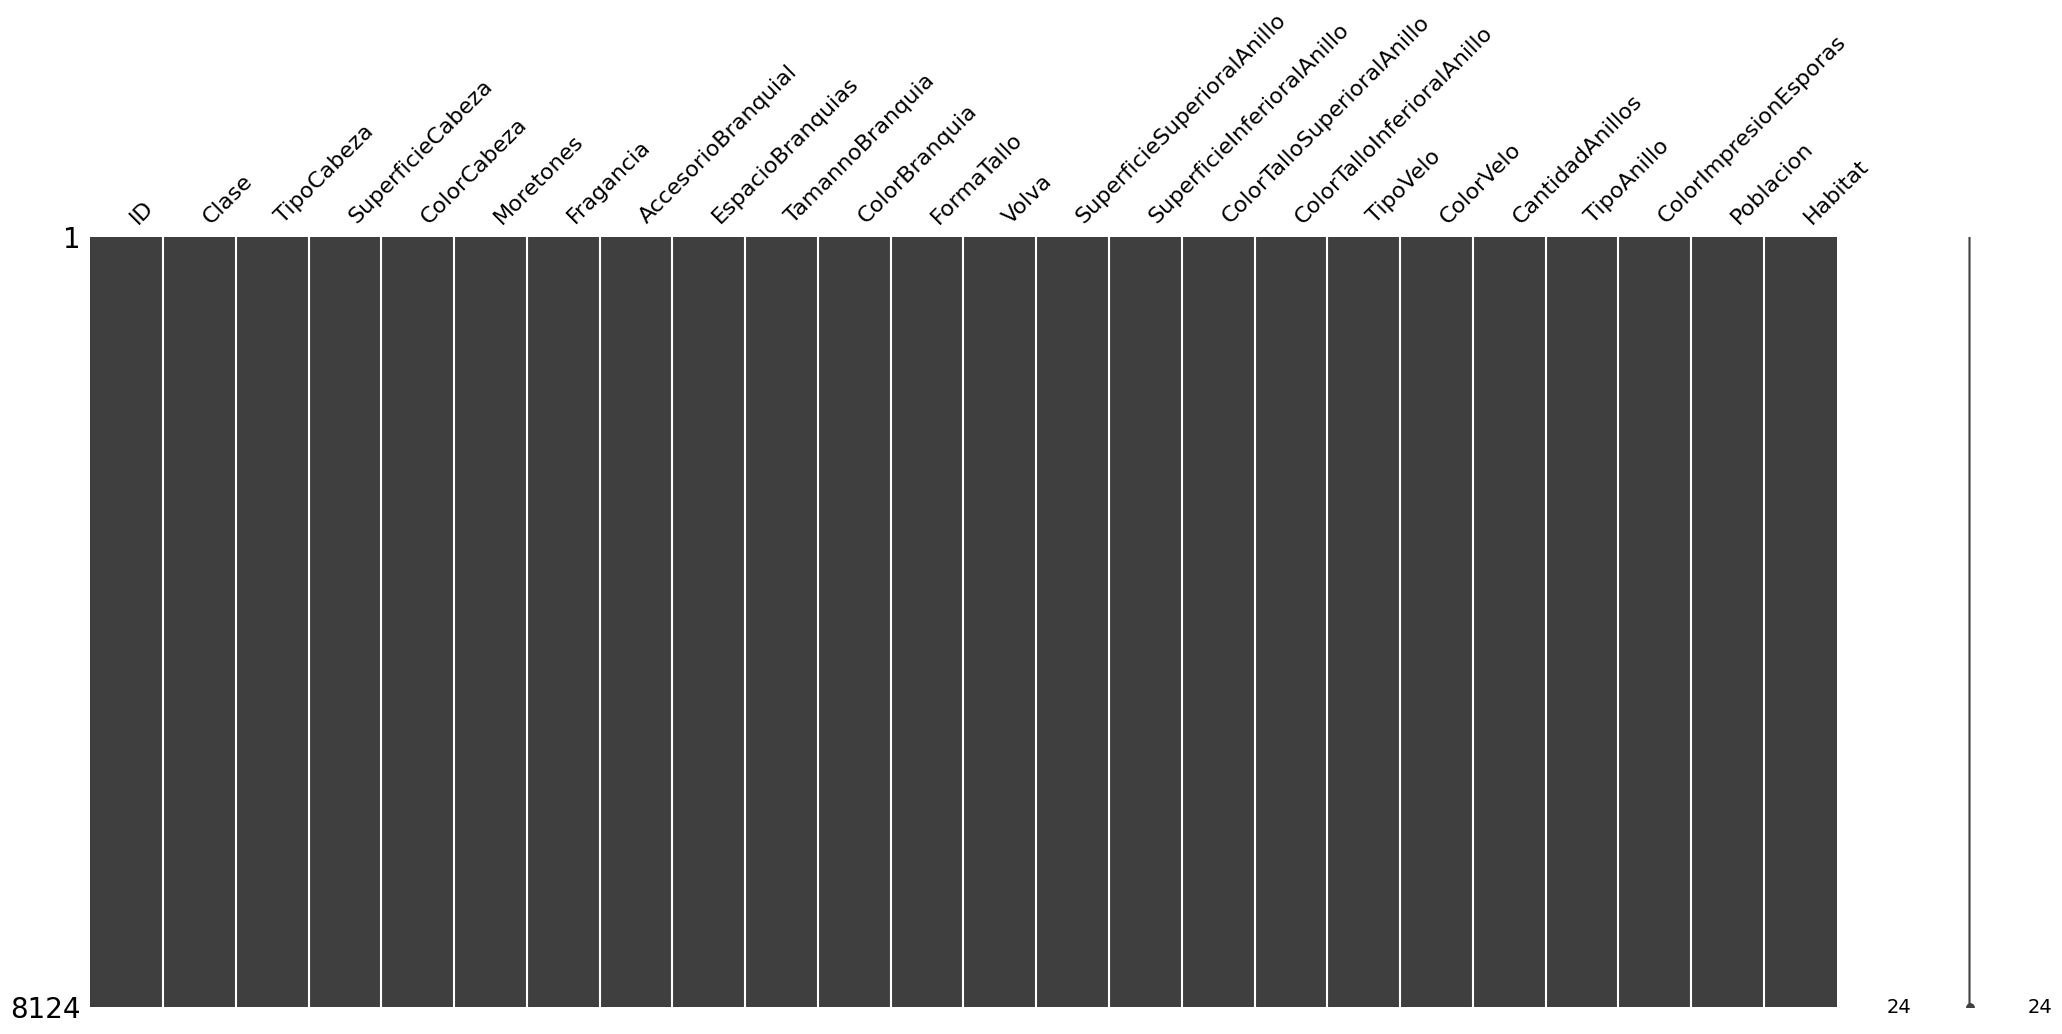

In [275]:
msno.matrix(data_set)

Observo las variables una por una en cuanto a sus valores nulos

In [276]:
a="-"

for i in range(1,25,1):
    b="-"
    a=a+b

a


'-------------------------'

In [277]:
print("Moretones")
print(a)
print('Conteo de valores por variable:\n',data_set.Clase.value_counts())
print('\n','Total de Valores nulos:',data_set.Clase.isnull().sum())

Moretones
-------------------------
Conteo de valores por variable:
 comestible    4208
venenosa      3916
Name: Clase, dtype: int64

 Total de Valores nulos: 0


In [278]:
print('Conteo de valores por variable:\n',data_set.TipoCabeza.value_counts())
print('\n','Total de Valores nulos:',data_set.TipoCabeza.isnull().sum())

Conteo de valores por variable:
 convexa         3656
plana           3152
protuberante     828
campana          452
hundida           32
conica             4
Name: TipoCabeza, dtype: int64

 Total de Valores nulos: 0


In [279]:
print('Conteo de valores por variable:\n',data_set.SuperficieCabeza.value_counts())
print('\n','Total de Valores nulos:',data_set.SuperficieCabeza.isnull().sum())

Conteo de valores por variable:
 escamosa    3244
lisa        2556
fibrosa     2320
ranuras        4
Name: SuperficieCabeza, dtype: int64

 Total de Valores nulos: 0


In [280]:
print('Conteo de valores por variable:\n',data_set.ColorCabeza.value_counts())
print('\n','Total de Valores nulos:',data_set.ColorCabeza.isnull().sum())

Conteo de valores por variable:
 marron      2284
gris        1840
rojo        1500
amarillo    1072
blanco      1040
beige        168
rosa         144
canela        44
violeta       16
verde         16
Name: ColorCabeza, dtype: int64

 Total de Valores nulos: 0


In [281]:
print('Conteo de valores por variable:\n',data_set.Moretones.value_counts())
print('\n','Total de Valores nulos:',data_set.Moretones.isnull().sum())

Conteo de valores por variable:
 no    4748
si    3376
Name: Moretones, dtype: int64

 Total de Valores nulos: 0


In [282]:
print('Conteo de valores por variable:\n',data_set.Fragancia.value_counts())
print('\n','Total de Valores nulos:',data_set.Fragancia.isnull().sum())

Conteo de valores por variable:
 inoloro      3528
fetido       2160
pescado       576
especiado     576
almendra      400
anis          400
acre          256
creosota      192
mohoso         36
Name: Fragancia, dtype: int64

 Total de Valores nulos: 0


In [283]:
print('Conteo de valores por variable:\n',data_set.AccesorioBranquial.value_counts())
print('\n','Total de Valores nulos:',data_set.AccesorioBranquial.isnull().sum())

Conteo de valores por variable:
 libre      7914
adjunto     210
Name: AccesorioBranquial, dtype: int64

 Total de Valores nulos: 0


In [284]:
print('Conteo de valores por variable:\n',data_set.EspacioBranquias.value_counts())
print('\n','Total de Valores nulos:',data_set.EspacioBranquias.isnull().sum())

Conteo de valores por variable:
 cerca         6812
abarrotado    1312
Name: EspacioBranquias, dtype: int64

 Total de Valores nulos: 0


In [285]:
print('Conteo de valores por variable:\n',data_set.TamannoBranquia.value_counts())
print('\n','Total de Valores nulos:',data_set.TamannoBranquia.isnull().sum())

Conteo de valores por variable:
 ancho       5612
estrecho    2512
Name: TamannoBranquia, dtype: int64

 Total de Valores nulos: 0


In [286]:
print('Conteo de valores por variable:\n',data_set.ColorBranquia.value_counts())
print('\n','Total de Valores nulos:',data_set.ColorBranquia.isnull().sum())

Conteo de valores por variable:
 beige        1728
rosa         1492
blanco       1202
marron       1048
gris          752
chocolate     732
violeta       492
negro         408
rojo           96
amarillo       86
naranja        64
verde          24
Name: ColorBranquia, dtype: int64

 Total de Valores nulos: 0


In [287]:
print('Conteo de valores por variable:\n',data_set.FormaTallo.value_counts())
print('\n','Total de Valores nulos:',data_set.FormaTallo.isnull().sum())

Conteo de valores por variable:
 disminuyendo    4608
agrandando      3516
Name: FormaTallo, dtype: int64

 Total de Valores nulos: 0


In [288]:
print('Conteo de valores por variable:\n',data_set.Volva.value_counts())
print('\n','Total de Valores nulos:',data_set.Volva.isnull().sum())

Conteo de valores por variable:
 bulboso      3776
faltante     2480
igual        1120
club          556
enraizado     192
Name: Volva, dtype: int64

 Total de Valores nulos: 0


En la variable Vovla observo que tengo 2480 registros con el valor '?' que es valor faltante. Procedo a reemplazarlo por la Moda de la variable. 

In [289]:
print('Conteo de valores por variable:\n',data_set.SuperficieSuperioralAnillo.value_counts())
print('\n','Total de Valores nulos:',data_set.SuperficieSuperioralAnillo.isnull().sum())

Conteo de valores por variable:
 liso        5176
sedoso      2372
fibroso      552
escamoso      24
Name: SuperficieSuperioralAnillo, dtype: int64

 Total de Valores nulos: 0


In [290]:
print('Conteo de valores por variable:\n',data_set.SuperficieInferioralAnillo.value_counts())
print('\n','Total de Valores nulos:',data_set.SuperficieInferioralAnillo.isnull().sum())

Conteo de valores por variable:
 liso        4936
sedoso      2304
fibroso      600
escamoso     284
Name: SuperficieInferioralAnillo, dtype: int64

 Total de Valores nulos: 0


In [291]:
print('Conteo de valores por variable:\n',data_set.ColorTalloSuperioralAnillo.value_counts())
print('\n','Total de Valores nulos:',data_set.ColorTalloSuperioralAnillo.isnull().sum())

Conteo de valores por variable:
 blanco      4464
rosa        1872
gris         576
marron       448
beige        432
naranja      192
rojo          96
canela        36
amarillo       8
Name: ColorTalloSuperioralAnillo, dtype: int64

 Total de Valores nulos: 0


In [292]:
print('Conteo de valores por variable:\n',data_set.ColorTalloInferioralAnillo.value_counts())
print('\n','Total de Valores nulos:',data_set.ColorTalloInferioralAnillo.isnull().sum())

Conteo de valores por variable:
 blanco      4384
rosa        1872
gris         576
marron       512
beige        432
naranja      192
rojo          96
canela        36
amarillo      24
Name: ColorTalloInferioralAnillo, dtype: int64

 Total de Valores nulos: 0


In [293]:
print('Conteo de valores por variable:\n',data_set.TipoVelo.value_counts())
print('\n','Total de Valores nulos:',data_set.TipoVelo.isnull().sum())

Conteo de valores por variable:
 parcial    8124
Name: TipoVelo, dtype: int64

 Total de Valores nulos: 0


In [294]:
print('Conteo de valores por variable:\n',data_set.ColorVelo.value_counts())
print('\n','Total de Valores nulos:',data_set.ColorVelo.isnull().sum())

Conteo de valores por variable:
 blanco      7924
marron        96
naranja       96
amarillo       8
Name: ColorVelo, dtype: int64

 Total de Valores nulos: 0


In [295]:
print('Conteo de valores por variable:\n',data_set.CantidadAnillos.value_counts())
print('\n','Total de Valores nulos:',data_set.CantidadAnillos.isnull().sum())

Conteo de valores por variable:
 uno        7488
dos         600
ninguno      36
Name: CantidadAnillos, dtype: int64

 Total de Valores nulos: 0


In [296]:
print('Conteo de valores por variable:\n',data_set.TipoAnillo.value_counts())
print('\n','Total de Valores nulos:',data_set.TipoAnillo.isnull().sum())

Conteo de valores por variable:
 colgante      3968
evanecente    2776
grande        1296
flaring         48
ninguno         36
Name: TipoAnillo, dtype: int64

 Total de Valores nulos: 0


In [297]:
print('Conteo de valores por variable:\n',data_set.ColorImpresionEsporas.value_counts())
print('\n','Total de Valores nulos:',data_set.ColorImpresionEsporas.isnull().sum())

Conteo de valores por variable:
 blacno       2388
marron       1968
negro        1872
chocolate    1632
verde          72
violeta        48
naranja        48
amarillo       48
beige          48
Name: ColorImpresionEsporas, dtype: int64

 Total de Valores nulos: 0


In [298]:
print('Conteo de valores por variable:\n',data_set.Poblacion.value_counts())
print('\n','Total de Valores nulos:',data_set.Poblacion.isnull().sum())

Conteo de valores por variable:
 diversa      4040
solitaria    1712
dispersa     1248
numerosa      400
abundante     384
agrupada      340
Name: Poblacion, dtype: int64

 Total de Valores nulos: 0


In [299]:
print('Conteo de valores por variable:\n',data_set.Habitat.value_counts())
print('\n','Total de Valores nulos:',data_set.Habitat.isnull().sum())

Conteo de valores por variable:
 bosques     3148
pastos      2148
senderos    1144
hojas        832
urbano       368
prados       292
residuos     192
Name: Habitat, dtype: int64

 Total de Valores nulos: 0


In [300]:
data_set.isnull().sum() #Dejo limpio la suma de valores nulos de todas las variables

ID                            0
Clase                         0
TipoCabeza                    0
SuperficieCabeza              0
ColorCabeza                   0
Moretones                     0
Fragancia                     0
AccesorioBranquial            0
EspacioBranquias              0
TamannoBranquia               0
ColorBranquia                 0
FormaTallo                    0
Volva                         0
SuperficieSuperioralAnillo    0
SuperficieInferioralAnillo    0
ColorTalloSuperioralAnillo    0
ColorTalloInferioralAnillo    0
TipoVelo                      0
ColorVelo                     0
CantidadAnillos               0
TipoAnillo                    0
ColorImpresionEsporas         0
Poblacion                     0
Habitat                       0
dtype: int64

El dataset que utilizo para los dos dataframe no contiene valores nulos, solamente en la variable Volva con valores a priori reemplazados por un simbolo. Estos mismos los reemplazare por la Moda de la variable, que desde el punto de vista taxonómico es relevante por que en la mayoria de casos que esta se encuentra presente, significa que la seta misma pertenece a la familia de las Amanitaceae. Esto tiene especial importancia debido al elevado número de especies venenosas que pertenecen a esta familia.

In [301]:
Moda=pd.Series(data_set[['Volva']].values.flatten()).mode()[0] #Obtengo un vector de la dimension original de la variable, lo "aplano" a una sola dimension y lo transformo en una serie para poder utilizar el metodo mode()
data_set.Volva=data_set.Volva.replace({"?": Moda})
data_set_encode.Volva=data_set_encode.Volva.replace({"?": Moda})
data_set_strings.Volva=data_set_strings.Volva.replace({"?": Moda})

In [302]:
print('Conteo de valores por variable:\n',data_set.Volva.value_counts(),data_set_encode.Volva.value_counts() ) #Compuebo su funcionamiento

Conteo de valores por variable:
 bulboso      3776
faltante     2480
igual        1120
club          556
enraizado     192
Name: Volva, dtype: int64 bulboso      3776
faltante     2480
igual        1120
club          556
enraizado     192
Name: Volva, dtype: int64


Seleccion de Variables

En este apartado comienzo la seleccion de las variables con las que voy a trabajar

In [303]:
data_set.columns.values

array(['ID', 'Clase', 'TipoCabeza', 'SuperficieCabeza', 'ColorCabeza',
       'Moretones', 'Fragancia', 'AccesorioBranquial', 'EspacioBranquias',
       'TamannoBranquia', 'ColorBranquia', 'FormaTallo', 'Volva',
       'SuperficieSuperioralAnillo', 'SuperficieInferioralAnillo',
       'ColorTalloSuperioralAnillo', 'ColorTalloInferioralAnillo',
       'TipoVelo', 'ColorVelo', 'CantidadAnillos', 'TipoAnillo',
       'ColorImpresionEsporas', 'Poblacion', 'Habitat'], dtype=object)

In [304]:
Variables_quitar=['ID','AccesorioBranquial','EspacioBranquias','Volva','SuperficieSuperioralAnillo','SuperficieInferioralAnillo','ColorTalloSuperioralAnillo', 'ColorTalloInferioralAnillo', 'TipoVelo', 'ColorVelo','CantidadAnillos', 'TipoAnillo','ColorImpresionEsporas']

In [305]:
data_set=data_set.drop(labels=Variables_quitar, axis=1)
data_set_encode=data_set_encode.drop(labels=Variables_quitar, axis=1)
data_set_strings=data_set_strings.drop(labels=Variables_quitar, axis=1)
print(data_set.columns,data_set_encode.columns,data_set_strings)

Index(['Clase', 'TipoCabeza', 'SuperficieCabeza', 'ColorCabeza', 'Moretones',
       'Fragancia', 'TamannoBranquia', 'ColorBranquia', 'FormaTallo',
       'Poblacion', 'Habitat'],
      dtype='object') Index(['Clase', 'TipoCabeza', 'SuperficieCabeza', 'ColorCabeza', 'Moretones',
       'Fragancia', 'TamannoBranquia', 'ColorBranquia', 'FormaTallo',
       'Poblacion', 'Habitat'],
      dtype='object')            Clase    TipoCabeza SuperficieCabeza ColorCabeza Moretones  \
0       venenosa       convexa             lisa      marron        si   
1     comestible       convexa             lisa    amarillo        si   
2     comestible       campana             lisa      blanco        si   
3       venenosa       convexa         escamosa      blanco        si   
4     comestible       convexa             lisa        gris        no   
5     comestible       convexa         escamosa    amarillo        si   
6     comestible       campana             lisa      blanco        si   
7     comest

Aplico el metodo Label Encoding al dataframe correspondiente para realizar graficos e identificar outliers

In [306]:
data_set.Clase=data_set.Clase.replace({'venenosa':'1','comestible':'2'})
leyenda_Clase=["1)Venenosa","2)Comestible"]
data_set.TipoCabeza=data_set.TipoCabeza.replace({'campana': 1,'conica' : 2,'convexa' : 3,'plana': 4,'protuberante': 5 ,'hundida' :6 })
leyenda_TipoCabeza=["1)Campana","2)Conica","3)Convexa","4)Plana","5)Protuberante","6)Hundida"]
data_set.SuperficieCabeza=data_set.SuperficieCabeza.replace({'escamosa': 1,'lisa' : 2,'fibrosa' : 3,'ranuras': 4})
leyenda_SuperficieCabeza=["1)Escamosa","2)Lisa","3)Fibrosa","4)Ranuras"]
data_set.ColorCabeza=data_set.ColorCabeza.replace({'marron':1 ,'beige':2,'canela':3,'gris':4,'verde':5,'rosa':6,'violeta':7,'rojo':8,'blanco':9,'amarillo':10})
leyenda_ColorCabeza=['1)marron' ,'2)beige','3)canela','4)gris','5)verde','6)rosa','7)violeta','8)rojo','9)blanco','10)amarillo']
data_set.Moretones=data_set.Moretones.replace({'si': 1,'no':2})
leyenda_Moretones=["1)Si posee","2)No posee"]
data_set.Fragancia=data_set.Fragancia.replace({'almendra':1,'anis':2,'creosota':3,'pescado':4,'fetido':5,'mohoso':6,'inoloro':7,'acre':8,'especiado':9})
leyenda_Fragancia=['1)Almendra','2)Anis','3)Creosota','4)Pescado','5)Fetido','6)Mohoso','7)Inoloro','8)Acre','9)Especiado']
data_set.TamannoBranquia=data_set.TamannoBranquia.replace({'ancho':1,'estrecho':2})
leyenda_TamannoBranquia=['1)Ancho',"2)Estrecho"]
data_set.ColorBranquia=data_set.ColorBranquia.replace({'beige':1 ,'rosa':2,'blanco':3,'marron':4,'gris':5,'chocolate':6,'violeta':7,'negro':8,'rojo':9,'amarillo':10,'naranja':11,'verde':12})
leyenda_ColorBranquia=['1)Beige','2)Rosa','3)Blanco','4)Marron','5)Gris','6)Chocolate','7)Violeta','8)Negro','9)Rojo','10)Amarillo','11)Naranja','12)Verde']
data_set.FormaTallo=data_set.FormaTallo.replace({'agrandando':'1','disminuyendo':'2'})
leyenda_FormaTallo=['1)Agrandando','2)Disminuyendo']
data_set.Habitat=data_set.Habitat.replace({'pastos':1,'hojas':2,'prados':3,'senderos':4,'urbano':5,'bosques':6,'residuos':7})
leyenda_Habitat=['1)Pastos','2)Hojas','3)Prados','4)Senderos','5)Urbano','6)Bosques','7)residuos']
data_set.Habitat=data_set.Habitat.replace({'pastos':1,'hojas':2,'prados':3,'senderos':4,'urbano':5,'bosques':6,'residuos':7})
leyenda_Habitat=['1)Pastos','2)Hojas','3)Prados','4)Senderos','5)Urbano','6)Bosques','7)residuos']
data_set.Poblacion=data_set.Poblacion.replace({'abundante':1,'agrupada':2,'numerosa':3,'dispersa':4,'diversa':5,'solitaria':6})
leyenda_Poblacion=['1)Abundante','2)Agrupada','3)Numerosa','4)Dispersa','5)Diversa','6)Solitaria']



<h1>Analisis de outliers en las variables</h1>

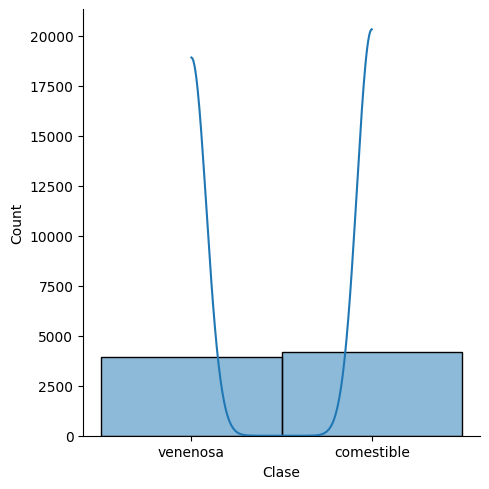

In [378]:
sns.displot(data_set_strings['Clase'],kde=True)

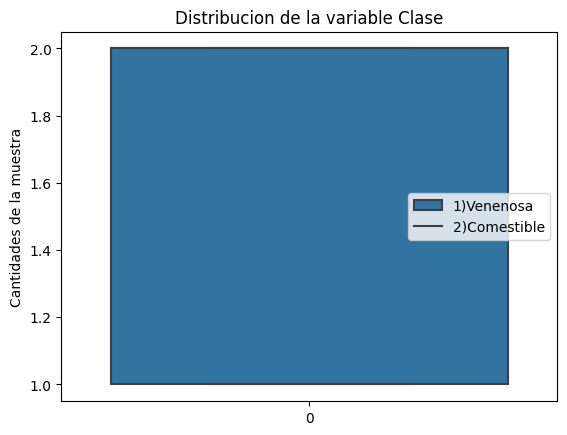

In [380]:
ax=sns.boxplot(data_set['Clase'])
ax.set(xlabel='', ylabel='Cantidades de la muestra',title='Distribucion de la variable Clase')
plt.legend(leyenda_Clase)

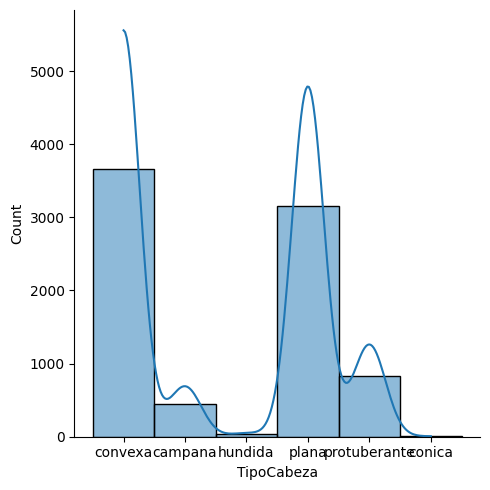

In [383]:
sns.displot(data_set_strings['TipoCabeza'],kde=True)

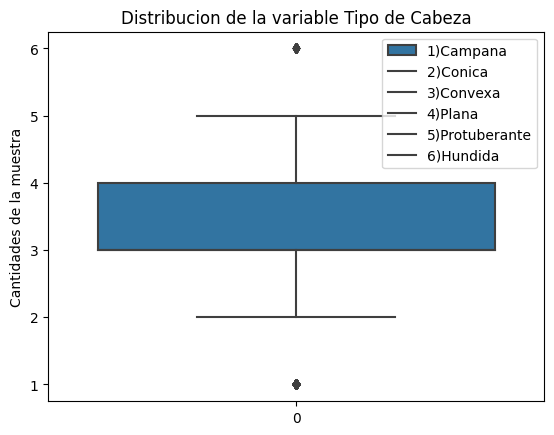

In [310]:
ax=sns.boxplot(data_set['TipoCabeza'])
ax.set(xlabel='', ylabel='Cantidades de la muestra',title='Distribucion de la variable Tipo de Cabeza')
plt.legend(leyenda_TipoCabeza)

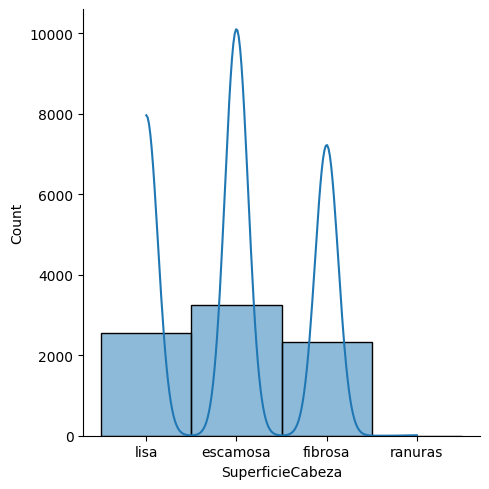

In [384]:
sns.displot(data_set_strings['SuperficieCabeza'],kde=True)

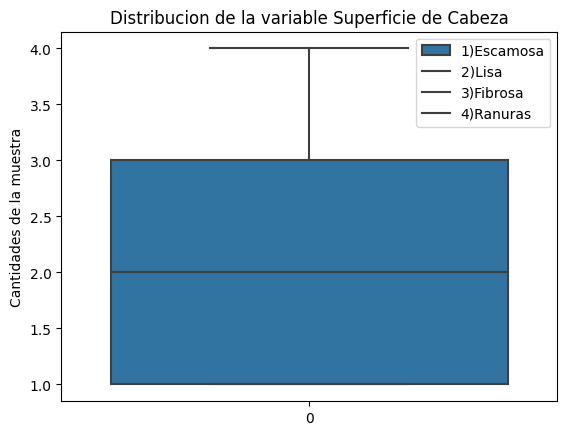

In [385]:
ax=sns.boxplot(data_set['SuperficieCabeza'])
ax.set(xlabel='', ylabel='Cantidades de la muestra',title='Distribucion de la variable Superficie de Cabeza')
plt.legend(leyenda_SuperficieCabeza)

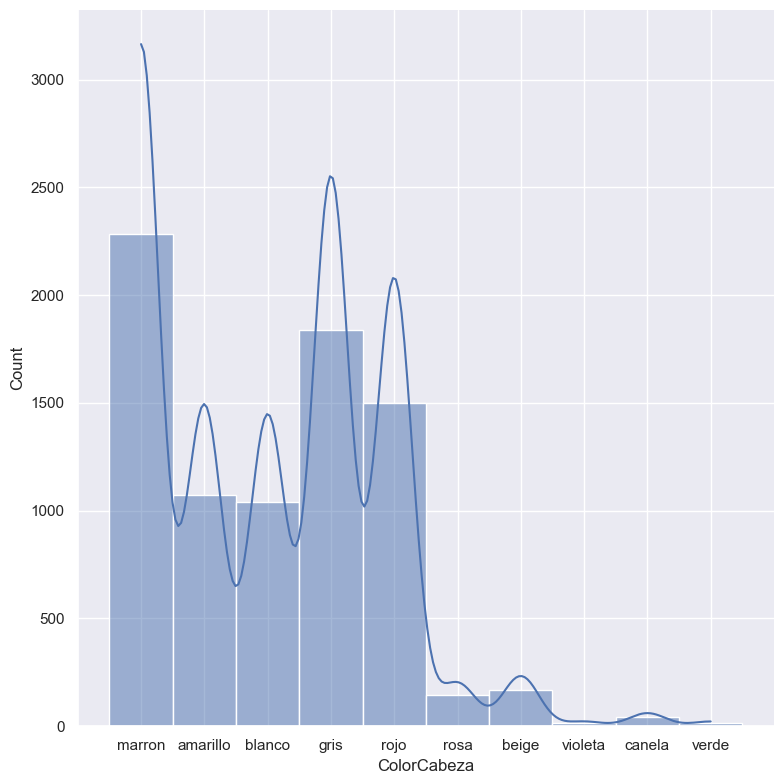

In [410]:
sns.displot(data_set_strings['ColorCabeza'],kde=True,height=8,aspect=15/15)

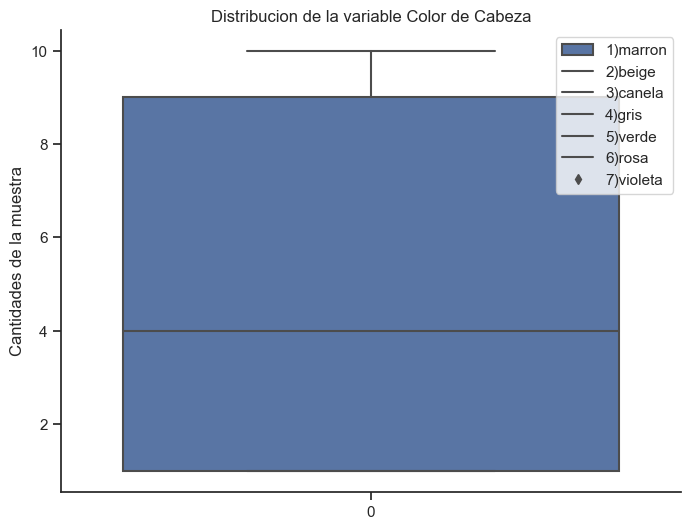

In [421]:
plt.figure(figsize=(8,6))
ax=sns.boxplot(data_set['ColorCabeza'])
ax.set(xlabel='', ylabel='Cantidades de la muestra',title='Distribucion de la variable Color de Cabeza')
plt.legend(leyenda_ColorCabeza)

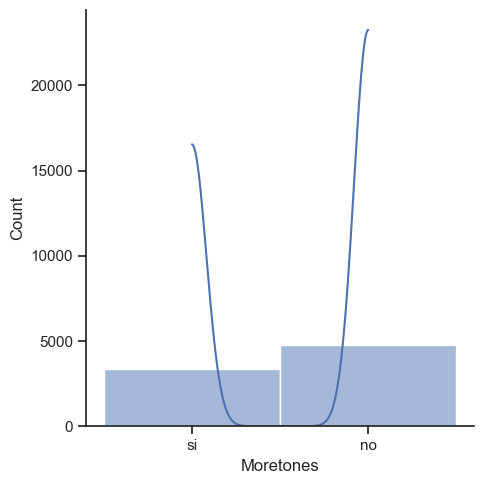

In [426]:
sns.displot(data_set_strings['Moretones'],kde=True)

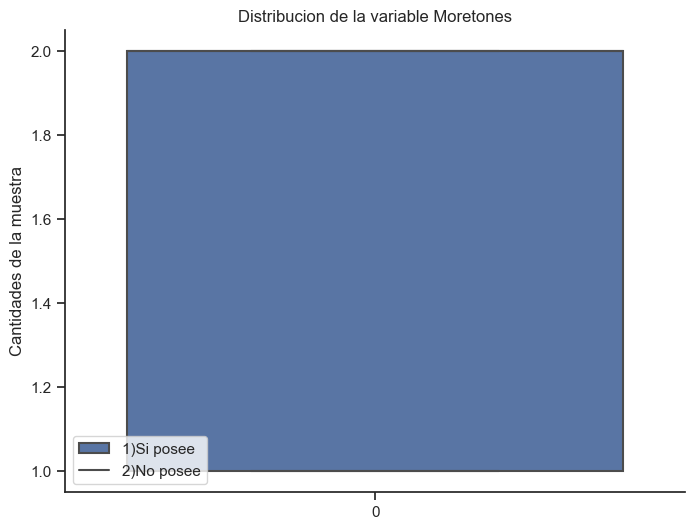

In [425]:
plt.figure(figsize=(8,6))
ax=sns.boxplot(data_set['Moretones'])
ax.set(xlabel='', ylabel='Cantidades de la muestra',title='Distribucion de la variable Moretones')
plt.legend(leyenda_Moretones)

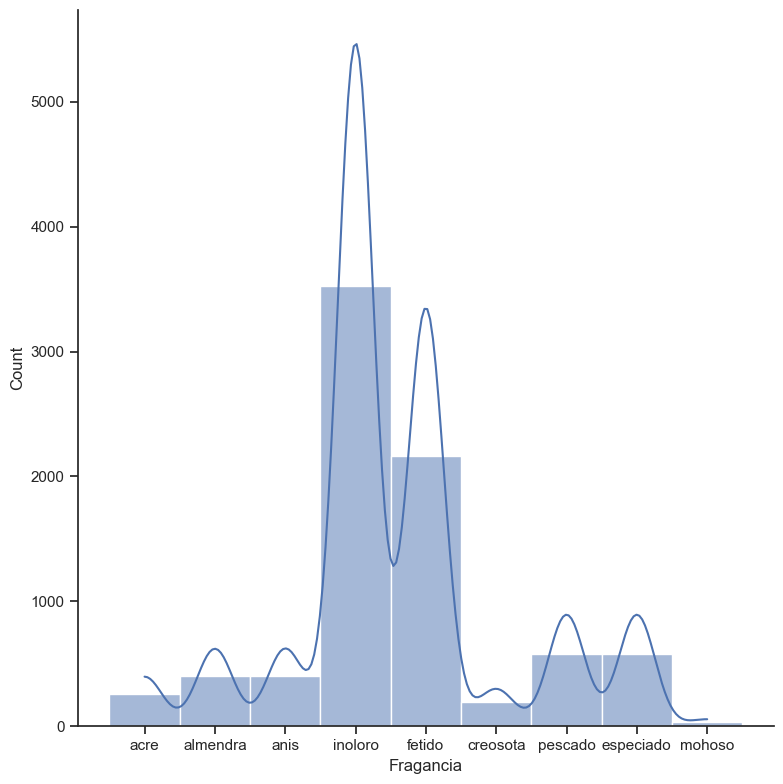

In [428]:
sns.displot(data_set_strings['Fragancia'],kde=True,height=8,aspect=15/15)

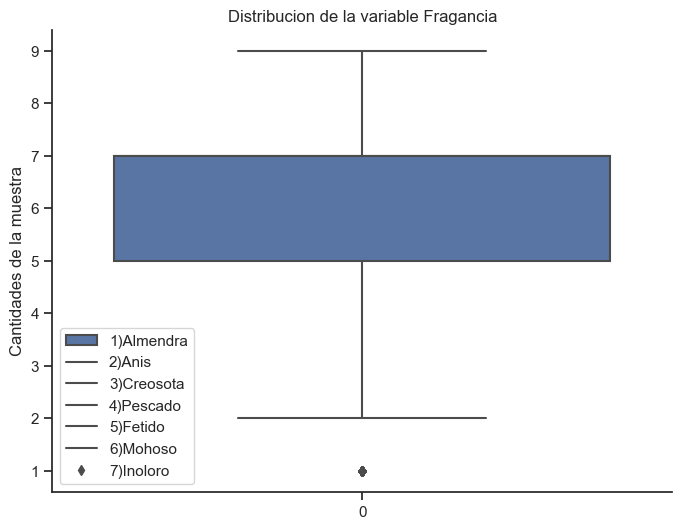

In [429]:
plt.figure(figsize=(8,6))
ax=sns.boxplot(data_set['Fragancia'])
ax.set(xlabel='', ylabel='Cantidades de la muestra',title='Distribucion de la variable Fragancia')
plt.legend(leyenda_Fragancia)

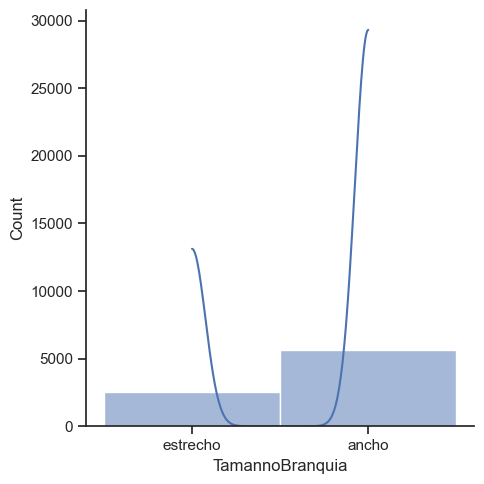

In [430]:
sns.displot(data_set_strings['TamannoBranquia'],kde=True)

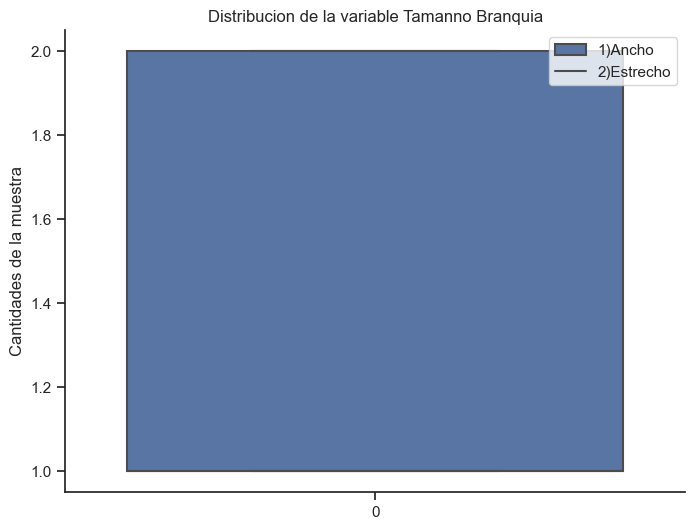

In [431]:
plt.figure(figsize=(8,6))
ax=sns.boxplot(data_set['TamannoBranquia'])
ax.set(xlabel='', ylabel='Cantidades de la muestra',title='Distribucion de la variable Tamanno Branquia')
plt.legend(leyenda_TamannoBranquia)

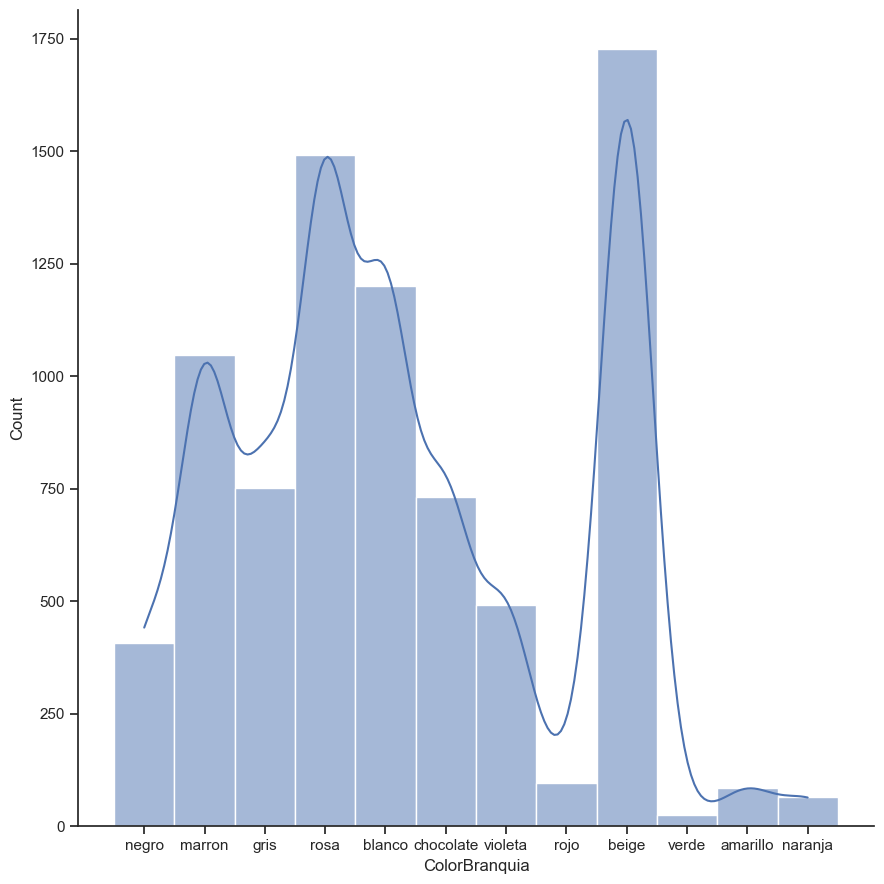

In [437]:
sns.displot(data_set_strings['ColorBranquia'],kde=True,height=9,aspect=25/25)

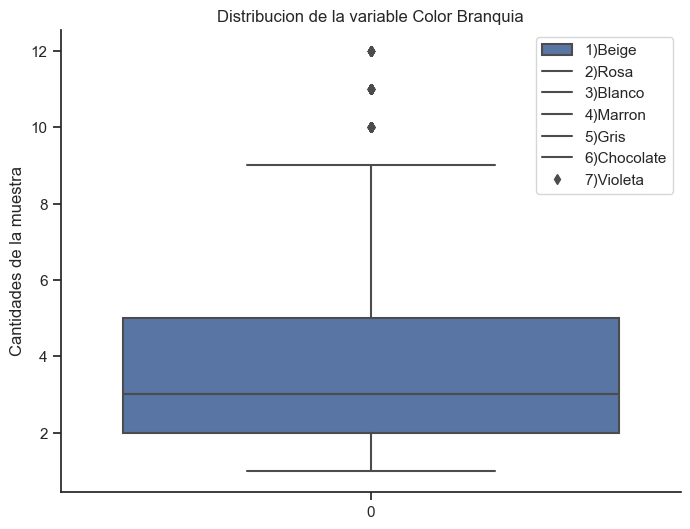

In [433]:
plt.figure(figsize=(8,6))
ax=sns.boxplot(data_set['ColorBranquia'])
ax.set(xlabel='', ylabel='Cantidades de la muestra',title='Distribucion de la variable Color Branquia')
plt.legend(leyenda_ColorBranquia)

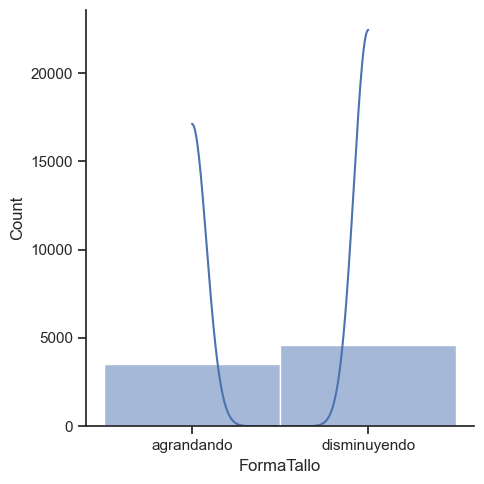

In [438]:
sns.displot(data_set_strings['FormaTallo'],kde=True)

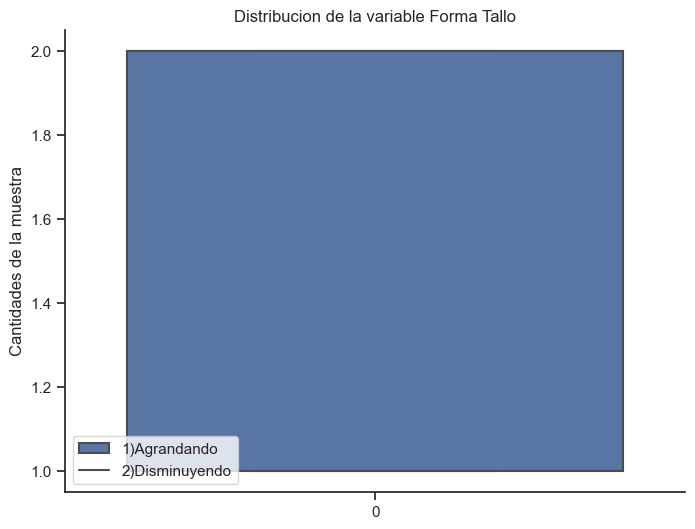

In [439]:
plt.figure(figsize=(8,6))
ax=sns.boxplot(data_set['FormaTallo'])
ax.set(xlabel='', ylabel='Cantidades de la muestra',title='Distribucion de la variable Forma Tallo')
plt.legend(leyenda_FormaTallo)

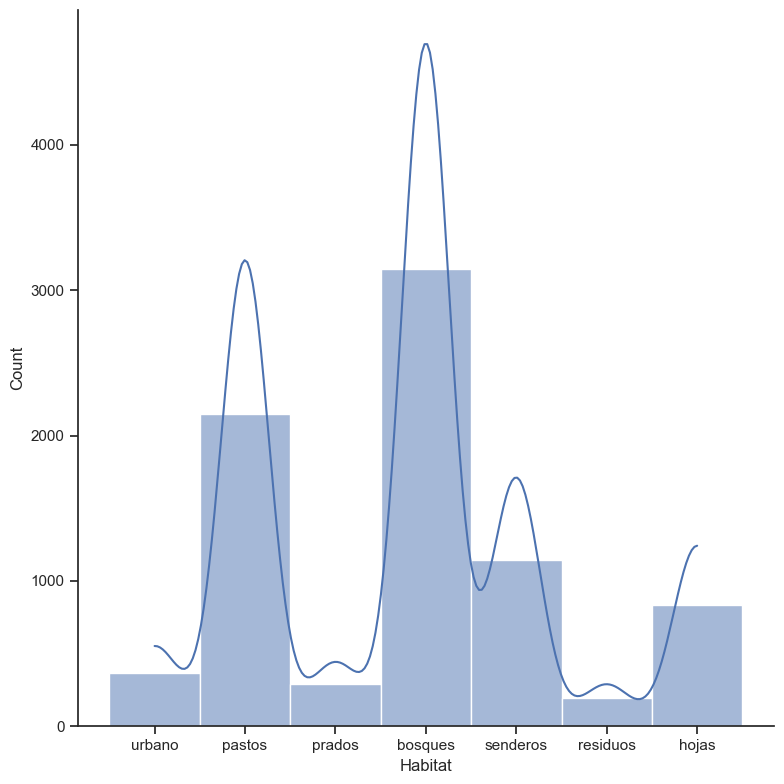

In [441]:
sns.displot(data_set_strings['Habitat'],kde=True,height=8,aspect=15/15)

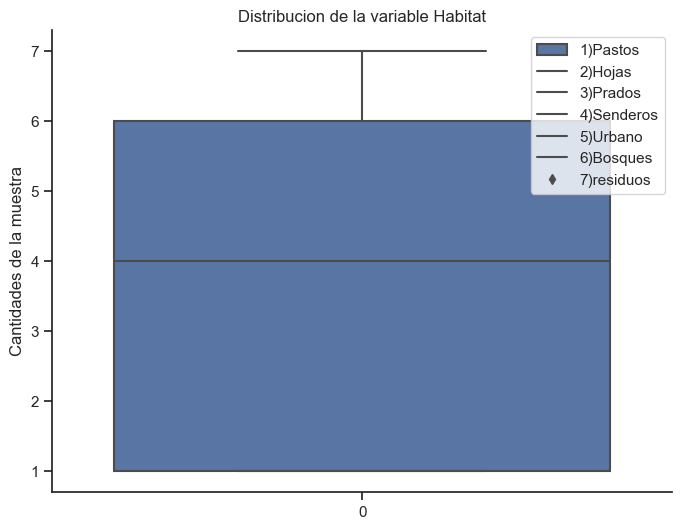

In [442]:
plt.figure(figsize=(8,6))
ax=sns.boxplot(data_set['Habitat'])
ax.set(xlabel='', ylabel='Cantidades de la muestra',title='Distribucion de la variable Habitat')
plt.legend(leyenda_Habitat)

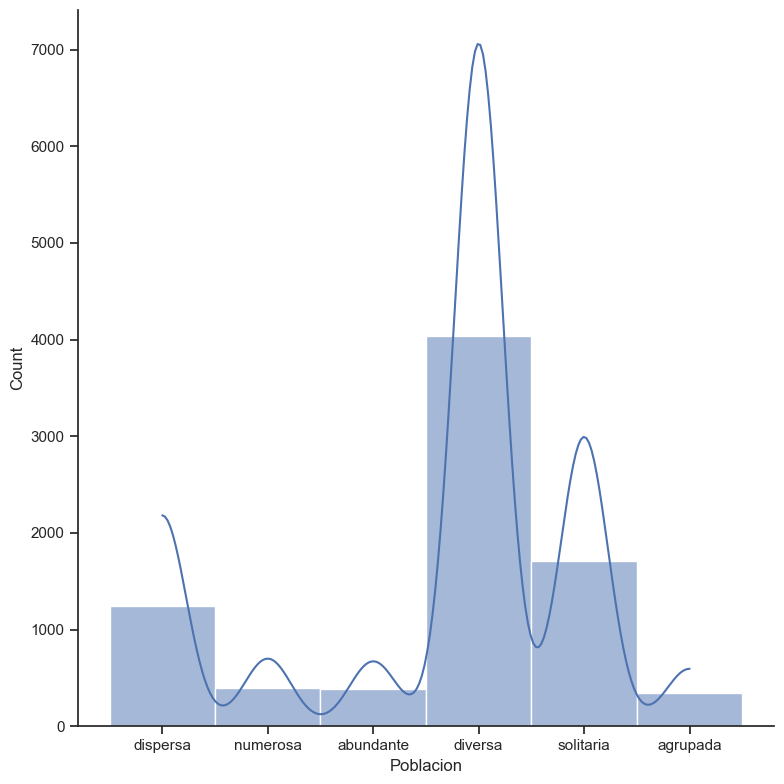

In [443]:
sns.displot(data_set_strings['Poblacion'],kde=True,height=8,aspect=15/15)

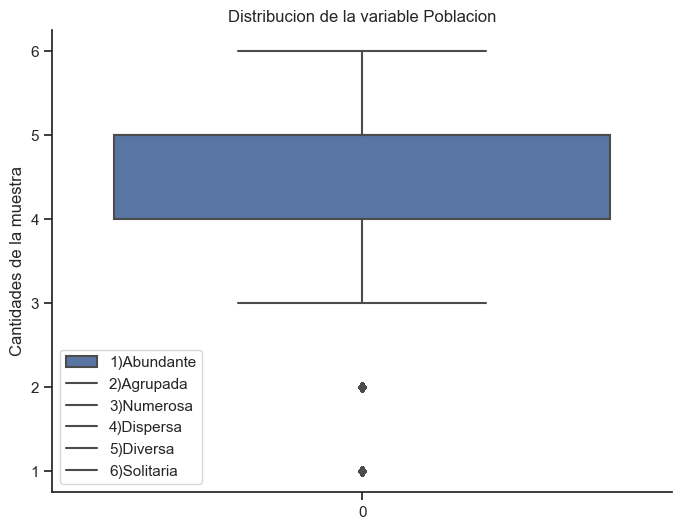

In [444]:
plt.figure(figsize=(8,6))
ax=sns.boxplot(data_set['Poblacion'])
ax.set(xlabel='', ylabel='Cantidades de la muestra',title='Distribucion de la variable Poblacion')
plt.legend(leyenda_Poblacion)

En cuanto a Outliers puedo identificar que no son registros erroneos ni por fuera del rango de valores de propia variable. En todos los casos los tendre en cuenta ya que pernecen a una seta que esta definida como tal y pertenece a la muestra.

<h1>Analisis Univariado</h1>

In [329]:
data_set.columns

Index(['Clase', 'TipoCabeza', 'SuperficieCabeza', 'ColorCabeza', 'Moretones',
       'Fragancia', 'TamannoBranquia', 'ColorBranquia', 'FormaTallo',
       'Poblacion', 'Habitat'],
      dtype='object')

In [330]:
Moda_Clase=int(pd.Series(data_set[['Clase']].values.flatten()).mode()[0])
Moda_TipoCabeza=int(pd.Series(data_set[['TipoCabeza']].values.flatten()).mode()[0])
Moda_SuperficieCabeza=int(pd.Series(data_set[['SuperficieCabeza']].values.flatten()).mode()[0])
Moda_ColorCabeza=int(pd.Series(data_set[['ColorCabeza']].values.flatten()).mode()[0])
Moda_Moretones=int(pd.Series(data_set[['Moretones']].values.flatten()).mode()[0])
Moda_Fragancia=int(pd.Series(data_set[['Fragancia']].values.flatten()).mode()[0])
Moda_TamannoBranquia=int(pd.Series(data_set[['TamannoBranquia']].values.flatten()).mode()[0])
Moda_ColorBranquia=int(pd.Series(data_set[['ColorBranquia']].values.flatten()).mode()[0])
Moda_FormaTallo=int(pd.Series(data_set[['FormaTallo']].values.flatten()).mode()[0])
Moda_Poblacion=int(pd.Series(data_set[['Poblacion']].values.flatten()).mode()[0])
Moda_Habitat=int(pd.Series(data_set[['Habitat']].values.flatten()).mode()[0])
Modas=[Moda_Clase,Moda_TipoCabeza,
       Moda_SuperficieCabeza,
       Moda_ColorCabeza,
       Moda_Moretones,
       Moda_Fragancia,
       Moda_TamannoBranquia,
       Moda_ColorBranquia,
       Moda_FormaTallo,
       Moda_Poblacion,
       Moda_Habitat]

[Text(0.5, 0, 'Valores de Moda'),
 Text(0, 0.5, 'Variables de la muestra'),
 Text(0.5, 1.0, 'Modas de cada variable')]

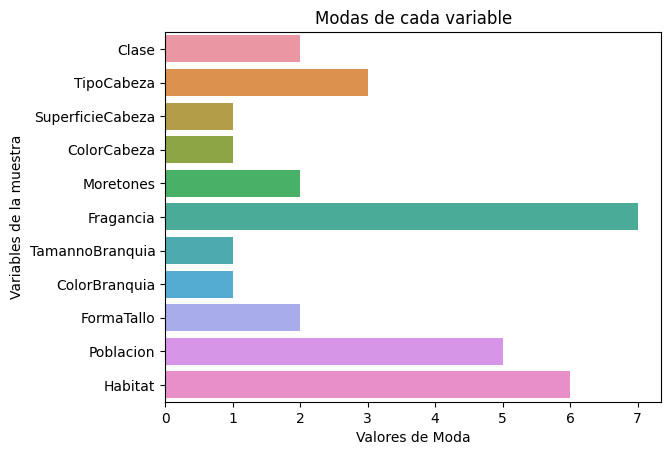

In [331]:
ax=sns.barplot(x=Modas,y=data_set.columns)
ax.set(xlabel='Valores de Moda', ylabel='Variables de la muestra',title='Modas de cada variable')


<h1>Analisis para obtencion de Insight</h1>

Como primera instancia se intenta reconocer visualmente posibles correlaciones entre variables de mayor significancia. Posteriormente se plantearan hipotesis mas relevantes a la correlacion obtenida y la importancia del modelo.

In [332]:
#Planteo una funcion para el calculo de funcion normal
def test_normality(variable, alpha=.05):
  k, pvalue = stats.normaltest(variable)
  if pvalue < alpha:
    print("La variable no se distribuye normalmente")
    print(pvalue)
  else:
    print("La variable se distribuye normalmente")
    print(pvalue)

*<H3>Que color predomina en una seta venenosa?</H3>*

In [333]:
#Obtengo las setas venenosas de la muestra y el color de cabeza que predomina
SetasVenenosas=data_set[data_set['Clase']=='1']
ModaColorVenenosa=pd.Series(SetasVenenosas[['ColorCabeza']].values.flatten()).mode()[0]
print(ModaColorVenenosa)

1


Obtengo que el color que predomina en las setas venenosas es el marron, pero que color predomina en las setas comestibles?

In [334]:
SetasComestible=data_set[data_set['Clase']=='2']
ModaColorComestible=pd.Series(SetasComestible[['ColorCabeza']].values.flatten()).mode()[0]
print(ModaColorComestible)

1


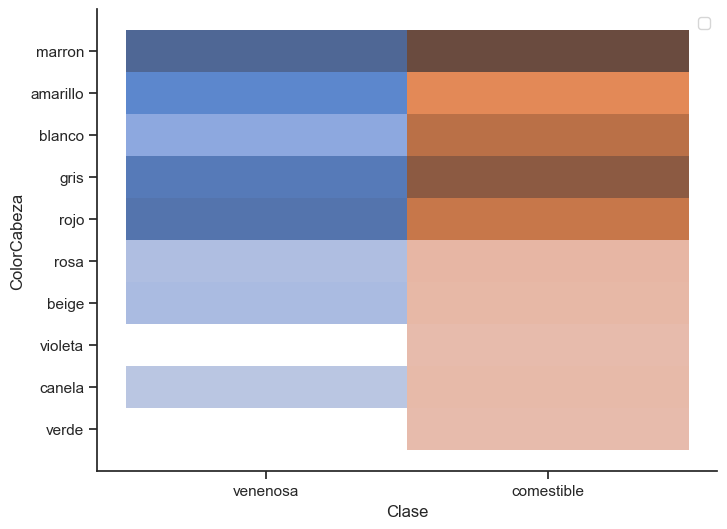

In [447]:
plt.figure(figsize=(8,6))
sns.histplot(x=data_set_strings['Clase'],y=data_set_strings['ColorCabeza'],hue=data_set['Clase'])
plt.legend(leyenda_ColorCabeza)

Puedo apreciar graficamente que el color Marron predomina en ambas clases, en la muestra, que clase posee la mayor cantidad de setas color marron?

In [336]:
ColorCabeza=SetasComestible.groupby('ColorCabeza').count()
ColorCabeza.head(5)

Clase  TipoCabeza  SuperficieCabeza  Moretones  Fragancia  \
ColorCabeza                                                              
1             1264        1264              1264       1264       1264   
2               48          48                48         48         48   
3               32          32                32         32         32   
4             1032        1032              1032       1032       1032   
5               16          16                16         16         16   

             TamannoBranquia  ColorBranquia  FormaTallo  Poblacion  Habitat  
ColorCabeza                                                                  
1                       1264           1264        1264       1264     1264  
2                         48             48          48         48       48  
3                         32             32          32         32       32  
4                       1032           1032        1032       1032     1032  
5                         16             16          16         16       16

In [337]:
ColorCabeza=SetasVenenosas.groupby('ColorCabeza').count()
ColorCabeza.head(5)

Clase  TipoCabeza  SuperficieCabeza  Moretones  Fragancia  \
ColorCabeza                                                              
1             1020        1020              1020       1020       1020   
2              120         120               120        120        120   
3               12          12                12         12         12   
4              808         808               808        808        808   
6               88          88                88         88         88   

             TamannoBranquia  ColorBranquia  FormaTallo  Poblacion  Habitat  
ColorCabeza                                                                  
1                       1020           1020        1020       1020     1020  
2                        120            120         120        120      120  
3                         12             12          12         12       12  
4                        808            808         808        808      808  
6                         88             88          88         88       88

In [338]:
leyenda_ColorCabeza

['1)marron',
 '2)beige',
 '3)canela',
 '4)gris',
 '5)verde',
 '6)rosa',
 '7)violeta',
 '8)rojo',
 '9)blanco',
 '10)amarillo']

Se puede observar que la muestra posee gran cantidad de setas de color de cabeza marron en ambas clases y la diferencia es por decenas. Esta informacion no tiene relevancia para el analisis, pero puedo extraer lo siguiente:
* Setas de color Rosa comestibles no existen en la muestra
* Setas de color Verde venenosas no exiten en la muestra


*<h3>Tiene un tallo peculiar una seta comestible?</h3>*

In [339]:
FormaTallo=SetasComestible.groupby('FormaTallo').count()
FormaTallo.head(5)

Clase  TipoCabeza  SuperficieCabeza  ColorCabeza  Moretones  \
FormaTallo                                                                
1            1616        1616              1616         1616       1616   
2            2592        2592              2592         2592       2592   

            Fragancia  TamannoBranquia  ColorBranquia  Poblacion  Habitat  
FormaTallo                                                                 
1                1616             1616           1616       1616     1616  
2                2592             2592           2592       2592     2592

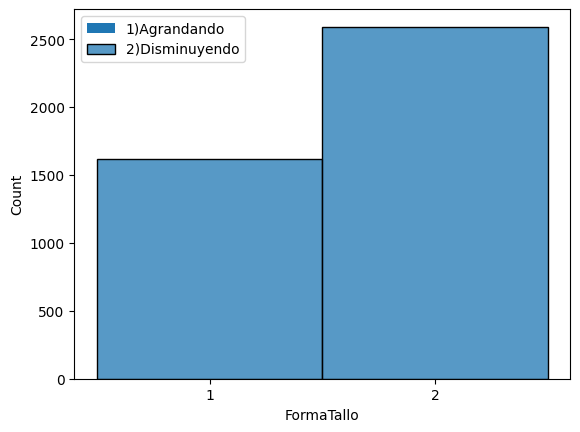

In [340]:
sns.histplot(x=SetasComestible['FormaTallo'])
plt.legend(leyenda_FormaTallo)

Existe una gran diferecia en las setas comestibles en cuanto a su tallo, pero analizare lo mismo en las setas venenosas para saber si es una especie de mayoria en la muestra o si difieren verdaderamente entre clases con la forma del tallo de la seta.

In [341]:
SetasVenenosas.groupby('FormaTallo').count().head(5)


Clase  TipoCabeza  SuperficieCabeza  ColorCabeza  Moretones  \
FormaTallo                                                                
1            1900        1900              1900         1900       1900   
2            2016        2016              2016         2016       2016   

            Fragancia  TamannoBranquia  ColorBranquia  Poblacion  Habitat  
FormaTallo                                                                 
1                1900             1900           1900       1900     1900  
2                2016             2016           2016       2016     2016

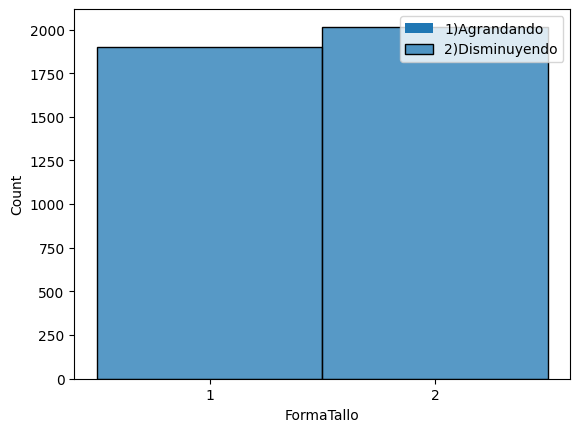

In [342]:
sns.histplot(x=SetasVenenosas['FormaTallo'])
plt.legend(leyenda_FormaTallo)

No se puede apreciar una diferencia significativa. Por lo que el tallo en si no condiciona a una seta por su clase.

*<h3>Que fragancias confundirian la distincion de setas?</h3>*

In [343]:
SetasVenenosas.groupby('Fragancia').count().head(5)

Clase  TipoCabeza  SuperficieCabeza  ColorCabeza  Moretones  \
Fragancia                                                                
3            192         192               192          192        192   
4            576         576               576          576        576   
5           2160        2160              2160         2160       2160   
6             36          36                36           36         36   
7            120         120               120          120        120   

           TamannoBranquia  ColorBranquia  FormaTallo  Poblacion  Habitat  
Fragancia                                                                  
3                      192            192         192        192      192  
4                      576            576         576        576      576  
5                     2160           2160        2160       2160     2160  
6                       36             36          36         36       36  
7                      120            120         120        120      120

In [344]:
SetasComestible.groupby('Fragancia').count().head(5)

Clase  TipoCabeza  SuperficieCabeza  ColorCabeza  Moretones  \
Fragancia                                                                
1            400         400               400          400        400   
2            400         400               400          400        400   
7           3408        3408              3408         3408       3408   

           TamannoBranquia  ColorBranquia  FormaTallo  Poblacion  Habitat  
Fragancia                                                                  
1                      400            400         400        400      400  
2                      400            400         400        400      400  
7                     3408           3408        3408       3408     3408

<AxesSubplot: xlabel='Fragancia', ylabel='Count'>

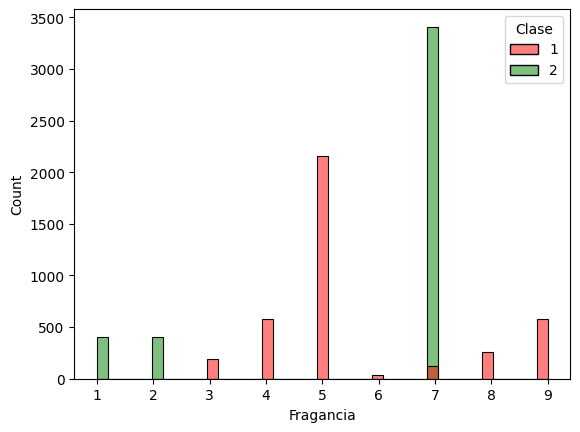

In [345]:
sns.histplot(x=data_set['Fragancia'],hue=data_set['Clase'],palette=['Red','Green'])#Rojo para Venenosas y Verde para Comestibles

In [526]:
test_normality(data_set['Fragancia'])

La variable no se distribuye normalmente
3.910770628408802e-127


Como primera instancia detecto que en el analisis univariado la curva de Fragancias no es normal, ademas calculo la media de mis dos categorias y no son iguales. 

Se puede observar una gran diferencia entre las fragancias de las setas con 2 puntos muy importantes a resaltar:
* En la muestra, de las setas Venenosas predomina la fragancia Fetido, mientras que en las comestibles es Inoloro. Ademas no comparten fragancias en igual de registros, por lo que esto indica una gran brecha de distincion. Se puede deducir que en presencia de un fragancia fetida nos podemos encontrar con una seta Venenosa, en cambio con una seta que no presenta fragancia hay una gran posibilidad de que estemos en presencia de una seta comestible dada la baja cantidad de registros de setas venenosas con fragancia Fetido.Dado que el cruce de fragancias en las setas Inoloras, es insignificante por su numero de setas venenosas con esta particularidad, se puede deducir que es una particularidad de algunas setas venenosas, por lo que confundirian en una distincion visual in situ. 

**Si contiene moretones, esto aumenta o disminuye la posibilidad de que la seta sea venenosa?**

In [350]:
SetasComestible.groupby('Moretones').count().head(5)

Clase  TipoCabeza  SuperficieCabeza  ColorCabeza  Fragancia  \
Moretones                                                                
1           2752        2752              2752         2752       2752   
2           1456        1456              1456         1456       1456   

           TamannoBranquia  ColorBranquia  FormaTallo  Poblacion  Habitat  
Moretones                                                                  
1                     2752           2752        2752       2752     2752  
2                     1456           1456        1456       1456     1456

In [351]:
SetasVenenosas.groupby('Moretones').count().head(5)

Clase  TipoCabeza  SuperficieCabeza  ColorCabeza  Fragancia  \
Moretones                                                                
1            624         624               624          624        624   
2           3292        3292              3292         3292       3292   

           TamannoBranquia  ColorBranquia  FormaTallo  Poblacion  Habitat  
Moretones                                                                  
1                      624            624         624        624      624  
2                     3292           3292        3292       3292     3292

<AxesSubplot: xlabel='Moretones', ylabel='Count'>

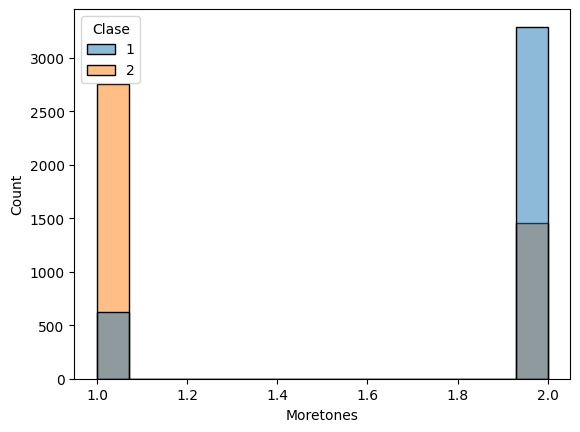

In [352]:
sns.histplot(x=data_set['Moretones'],hue=data_set['Clase'])

Como primera instancia detecto que en el analisis univariado la curva de Fragancias no es normal.Procedo a utilizar la funcion de testeo de normalidad.

In [527]:
test_normality(data_set['Moretones'])

La variable no se distribuye normalmente
0.0


Se aprecia una distincion entre la setas que poseen y que no poseen moretones, dependiendo su clase. Ya que en cantidad de registros las setas comestibles tienen mayor cantidad que posee moretones, en cambio en las setas venenosas existe un mayor grupo que no posee moretones. Dado que las medias de estas dos categorias son diferentes, deduzco que mi hipotesis H1 es verdadera, ya que existe una posible distincion entre las clases de las setas mediante la presencia o ausencia de moretones en ellas. Esta hipotesis no responde correctamente mi pregunta ya que es por posibilidades, pero si da una fuerte explicacion. 
En la muestra las setas venenosas, por su cantidad de registros no posee moretones significativamente. En cambio en las setas comestibles si tenemos una presencia de moretones en su mayoria de registros. 

El formato de cabeza tiene relacion con la fragancia?

*<h3>El tamanno de las branquias y el tipo de cabeza, tienen alguna relacion entre si?</h3>*

In [356]:
data_set.groupby('TamannoBranquia').count().head(5)

Clase  TipoCabeza  SuperficieCabeza  ColorCabeza  Moretones  \
TamannoBranquia                                                                
1                 5612        5612              5612         5612       5612   
2                 2512        2512              2512         2512       2512   

                 Fragancia  ColorBranquia  FormaTallo  Poblacion  Habitat  
TamannoBranquia                                                            
1                     5612           5612        5612       5612     5612  
2                     2512           2512        2512       2512     2512

In [357]:
data_set.groupby('TipoCabeza').count().head(5)

Clase  SuperficieCabeza  ColorCabeza  Moretones  Fragancia  \
TipoCabeza                                                               
1             452               452          452        452        452   
2               4                 4            4          4          4   
3            3656              3656         3656       3656       3656   
4            3152              3152         3152       3152       3152   
5             828               828          828        828        828   

            TamannoBranquia  ColorBranquia  FormaTallo  Poblacion  Habitat  
TipoCabeza                                                                  
1                       452            452         452        452      452  
2                         4              4           4          4        4  
3                      3656           3656        3656       3656     3656  
4                      3152           3152        3152       3152     3152  
5                       828            828         828        828      828

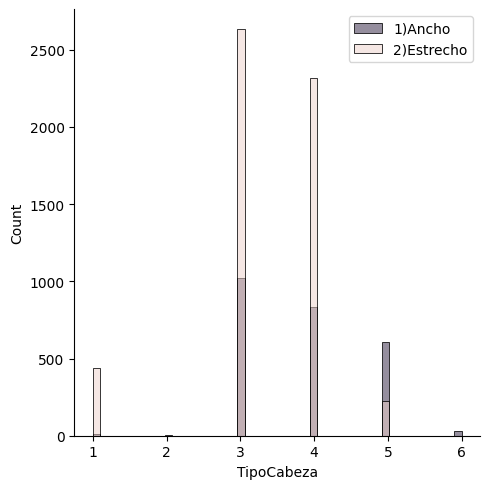

In [358]:
sns.displot(x=data_set['TipoCabeza'],hue=data_set['TamannoBranquia'],legend=False)
plt.legend(leyenda_TamannoBranquia)

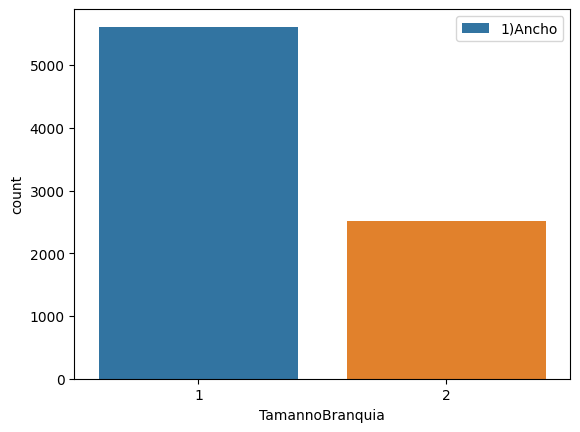

In [359]:
sns.countplot(x='TamannoBranquia', data=data_set)
plt.legend(leyenda_TamannoBranquia)

In [360]:
print(leyenda_TipoCabeza)
print(leyenda_TamannoBranquia)

['1)Campana', '2)Conica', '3)Convexa', '4)Plana', '5)Protuberante', '6)Hundida']
['1)Ancho', '2)Estrecho']


In [361]:
PorcentajeDelTotalAncho=(100*5612/8124)
print(PorcentajeDelTotalAncho)

69.0792712949286


Visualmente no se puede apreciar una distincion precisa, ya que la mayoria de los registros estan distribuidos en solo dos categorias Convexa y Plana. Un punto importante a resaltar es la diferencia entre las categorias de la variable Tamanno Branquia, la categoria Ancho contiene el 69.07% de los datos. 

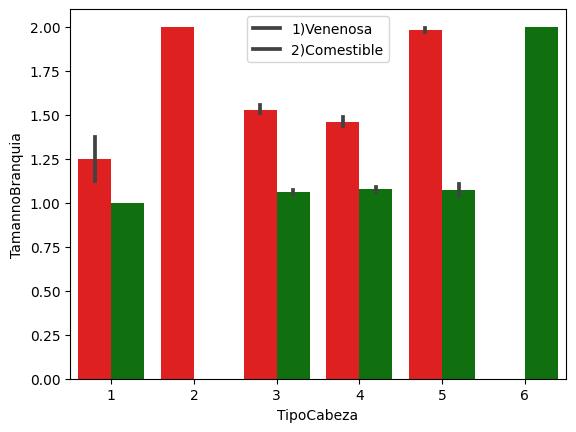

In [362]:
sns.barplot(x=data_set['TipoCabeza'],y=data_set['TamannoBranquia'],hue=data_set['Clase'],palette=['Red','Green'])#Rojo Venenosas, Verde Comestibles
plt.legend(leyenda_Clase)

<AxesSubplot: xlabel='TipoCabeza', ylabel='TamannoBranquia'>

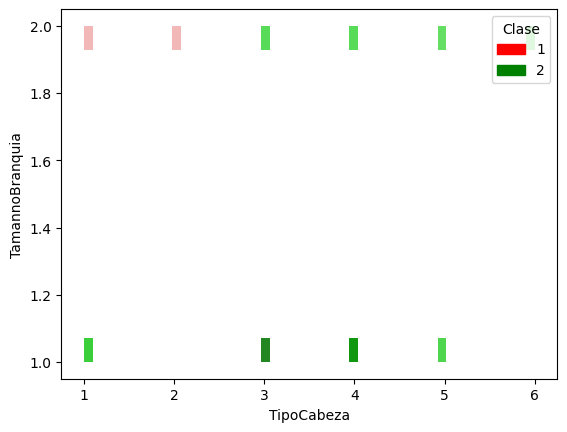

In [363]:
sns.histplot(x=data_set['TipoCabeza'],y=data_set['TamannoBranquia'],hue=data_set['Clase'],palette=['Red','Green'],legend=True)#Rojo Venenosas, Verde Comestibles
#plt.legend(leyenda_Clase)

In [364]:
print(leyenda_TipoCabeza)
print(leyenda_TamannoBranquia)

['1)Campana', '2)Conica', '3)Convexa', '4)Plana', '5)Protuberante', '6)Hundida']
['1)Ancho', '2)Estrecho']


En cuanto a la diferenciacion por Clase, se pueden apreciar 2 tipos de cabeza que solo se presentan en una categoria de la variable 1) el tipo de Cabeza Conica para las seta venenosas y 2) el tipo de cabeza Hundida en las setas comestibles. 

In [366]:
print(test_normality(data_set['TamannoBranquia']))
print(test_normality(data_set['TipoCabeza']))

La variable no se distribuye normalmente
0.0
None
La variable no se distribuye normalmente
2.373733936083042e-149
None


*<h3>Analisis Bivariado </h3>*

In [511]:
from scipy.stats import chi2_contingency

def cramers_V(var1,var2) :
  crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
  stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
  obs = np.sum(crosstab) # Number of observations
  mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
  return (stat/(obs*mini))

In [512]:
rows= []

for var1 in data_set_encode:
  col = []
  for var2 in data_set_encode :
    cramers =cramers_V(data_set_encode[var1], data_set_encode[var2]) # Cramer's V test
    col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
  rows.append(col)
  
cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns = data_set_encode.columns, index =data_set_encode.columns)



df

Clase  TipoCabeza  SuperficieCabeza  ColorCabeza  Moretones  \
Clase              1.00        0.06              0.04         0.05       0.25   
TipoCabeza         0.06        1.00              0.04         0.03       0.07   
SuperficieCabeza   0.04        0.04              1.00         0.05       0.02   
ColorCabeza        0.05        0.03              0.05         1.00       0.05   
Moretones          0.25        0.07              0.02         0.05       1.00   
Fragancia          0.94        0.06              0.06         0.11       0.44   
TamannoBranquia    0.29        0.12              0.08         0.22       0.14   
ColorBranquia      0.46        0.06              0.07         0.08       0.42   
FormaTallo         0.01        0.09              0.01         0.35       0.01   
Poblacion          0.24        0.06              0.07         0.09       0.09   
Habitat            0.19        0.07              0.06         0.11       0.28   

                  Fragancia  TamannoBranquia  ColorBranquia  FormaTallo  \
Clase                  0.94             0.29           0.46        0.01   
TipoCabeza             0.06             0.12           0.06        0.09   
SuperficieCabeza       0.06             0.08           0.07        0.01   
ColorCabeza            0.11             0.22           0.08        0.35   
Moretones              0.44             0.14           0.42        0.01   
Fragancia              1.00             0.58           0.15        0.33   
TamannoBranquia        0.58             1.00           0.61        0.05   
ColorBranquia          0.15             0.61           1.00        0.37   
FormaTallo             0.33             0.05           0.37        1.00   
Poblacion              0.14             0.27           0.18        0.21   
Habitat                0.14             0.25           0.21        0.17   

                  Poblacion  Habitat  
Clase                  0.24     0.19  
TipoCabeza             0.06     0.07  
SuperficieCabeza       0.07     0.06  
ColorCabeza            0.09     0.11  
Moretones              0.09     0.28  
Fragancia              0.14     0.14  
TamannoBranquia        0.27     0.25  
ColorBranquia          0.18     0.21  
FormaTallo             0.21     0.17  
Poblacion              1.00     0.26  
Habitat                0.26     1.00

In [513]:
data_set_encode.head(5)


Clase TipoCabeza SuperficieCabeza ColorCabeza Moretones Fragancia  \
0    venenosa    convexa             lisa      marron        si      acre   
1  comestible    convexa             lisa    amarillo        si  almendra   
2  comestible    campana             lisa      blanco        si      anis   
3    venenosa    convexa         escamosa      blanco        si      acre   
4  comestible    convexa             lisa        gris        no   inoloro   

  TamannoBranquia ColorBranquia    FormaTallo  Poblacion Habitat  
0        estrecho         negro    agrandando   dispersa  urbano  
1           ancho         negro    agrandando   numerosa  pastos  
2           ancho        marron    agrandando   numerosa  prados  
3        estrecho        marron    agrandando   dispersa  urbano  
4           ancho         negro  disminuyendo  abundante  pastos

In [514]:
data_set.Clase=pd.to_numeric(data_set.Clase,downcast='float')
data_set.TipoCabeza=pd.to_numeric(data_set.TipoCabeza,downcast='float')
data_set.SuperficieCabeza=pd.to_numeric(data_set.SuperficieCabeza,downcast='float')
data_set.ColorCabeza=pd.to_numeric(data_set.ColorCabeza,downcast='float')
data_set.Moretones=pd.to_numeric(data_set.Moretones,downcast='float')
data_set.Fragancia=pd.to_numeric(data_set.Fragancia,downcast='float')
data_set.TamannoBranquia=pd.to_numeric(data_set.TamannoBranquia,downcast='float')
data_set.ColorBranquia=pd.to_numeric(data_set.ColorBranquia,downcast='float')
data_set.FormaTallo=pd.to_numeric(data_set.FormaTallo,downcast='float')
data_set.Poblacion=pd.to_numeric(data_set.Poblacion,downcast='float')
data_set.Habitat=pd.to_numeric(data_set.Habitat,downcast='float')
data_set.dtypes

Clase               float32
TipoCabeza          float32
SuperficieCabeza    float32
ColorCabeza         float32
Moretones           float32
Fragancia           float32
TamannoBranquia     float32
ColorBranquia       float32
FormaTallo          float32
Poblacion           float32
Habitat             float32
dtype: object

Efectivamente la curva no es normal. Al tener registros enteros no es posible el calculo de correlacion de sprearman

In [515]:
data_set.head(5)

Clase  TipoCabeza  SuperficieCabeza  ColorCabeza  Moretones  Fragancia  \
0    1.0         3.0               2.0          1.0        1.0        8.0   
1    2.0         3.0               2.0         10.0        1.0        1.0   
2    2.0         1.0               2.0          9.0        1.0        2.0   
3    1.0         3.0               1.0          9.0        1.0        8.0   
4    2.0         3.0               2.0          4.0        2.0        7.0   

   TamannoBranquia  ColorBranquia  FormaTallo  Poblacion  Habitat  
0              2.0            8.0         1.0        4.0      5.0  
1              1.0            8.0         1.0        3.0      1.0  
2              1.0            4.0         1.0        3.0      3.0  
3              2.0            4.0         1.0        4.0      5.0  
4              1.0            8.0         2.0        1.0      1.0

C:\Users\Lauti\AppData\Local\Temp\ipykernel_1480\304856857.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(data_set, dtype=np.bool)


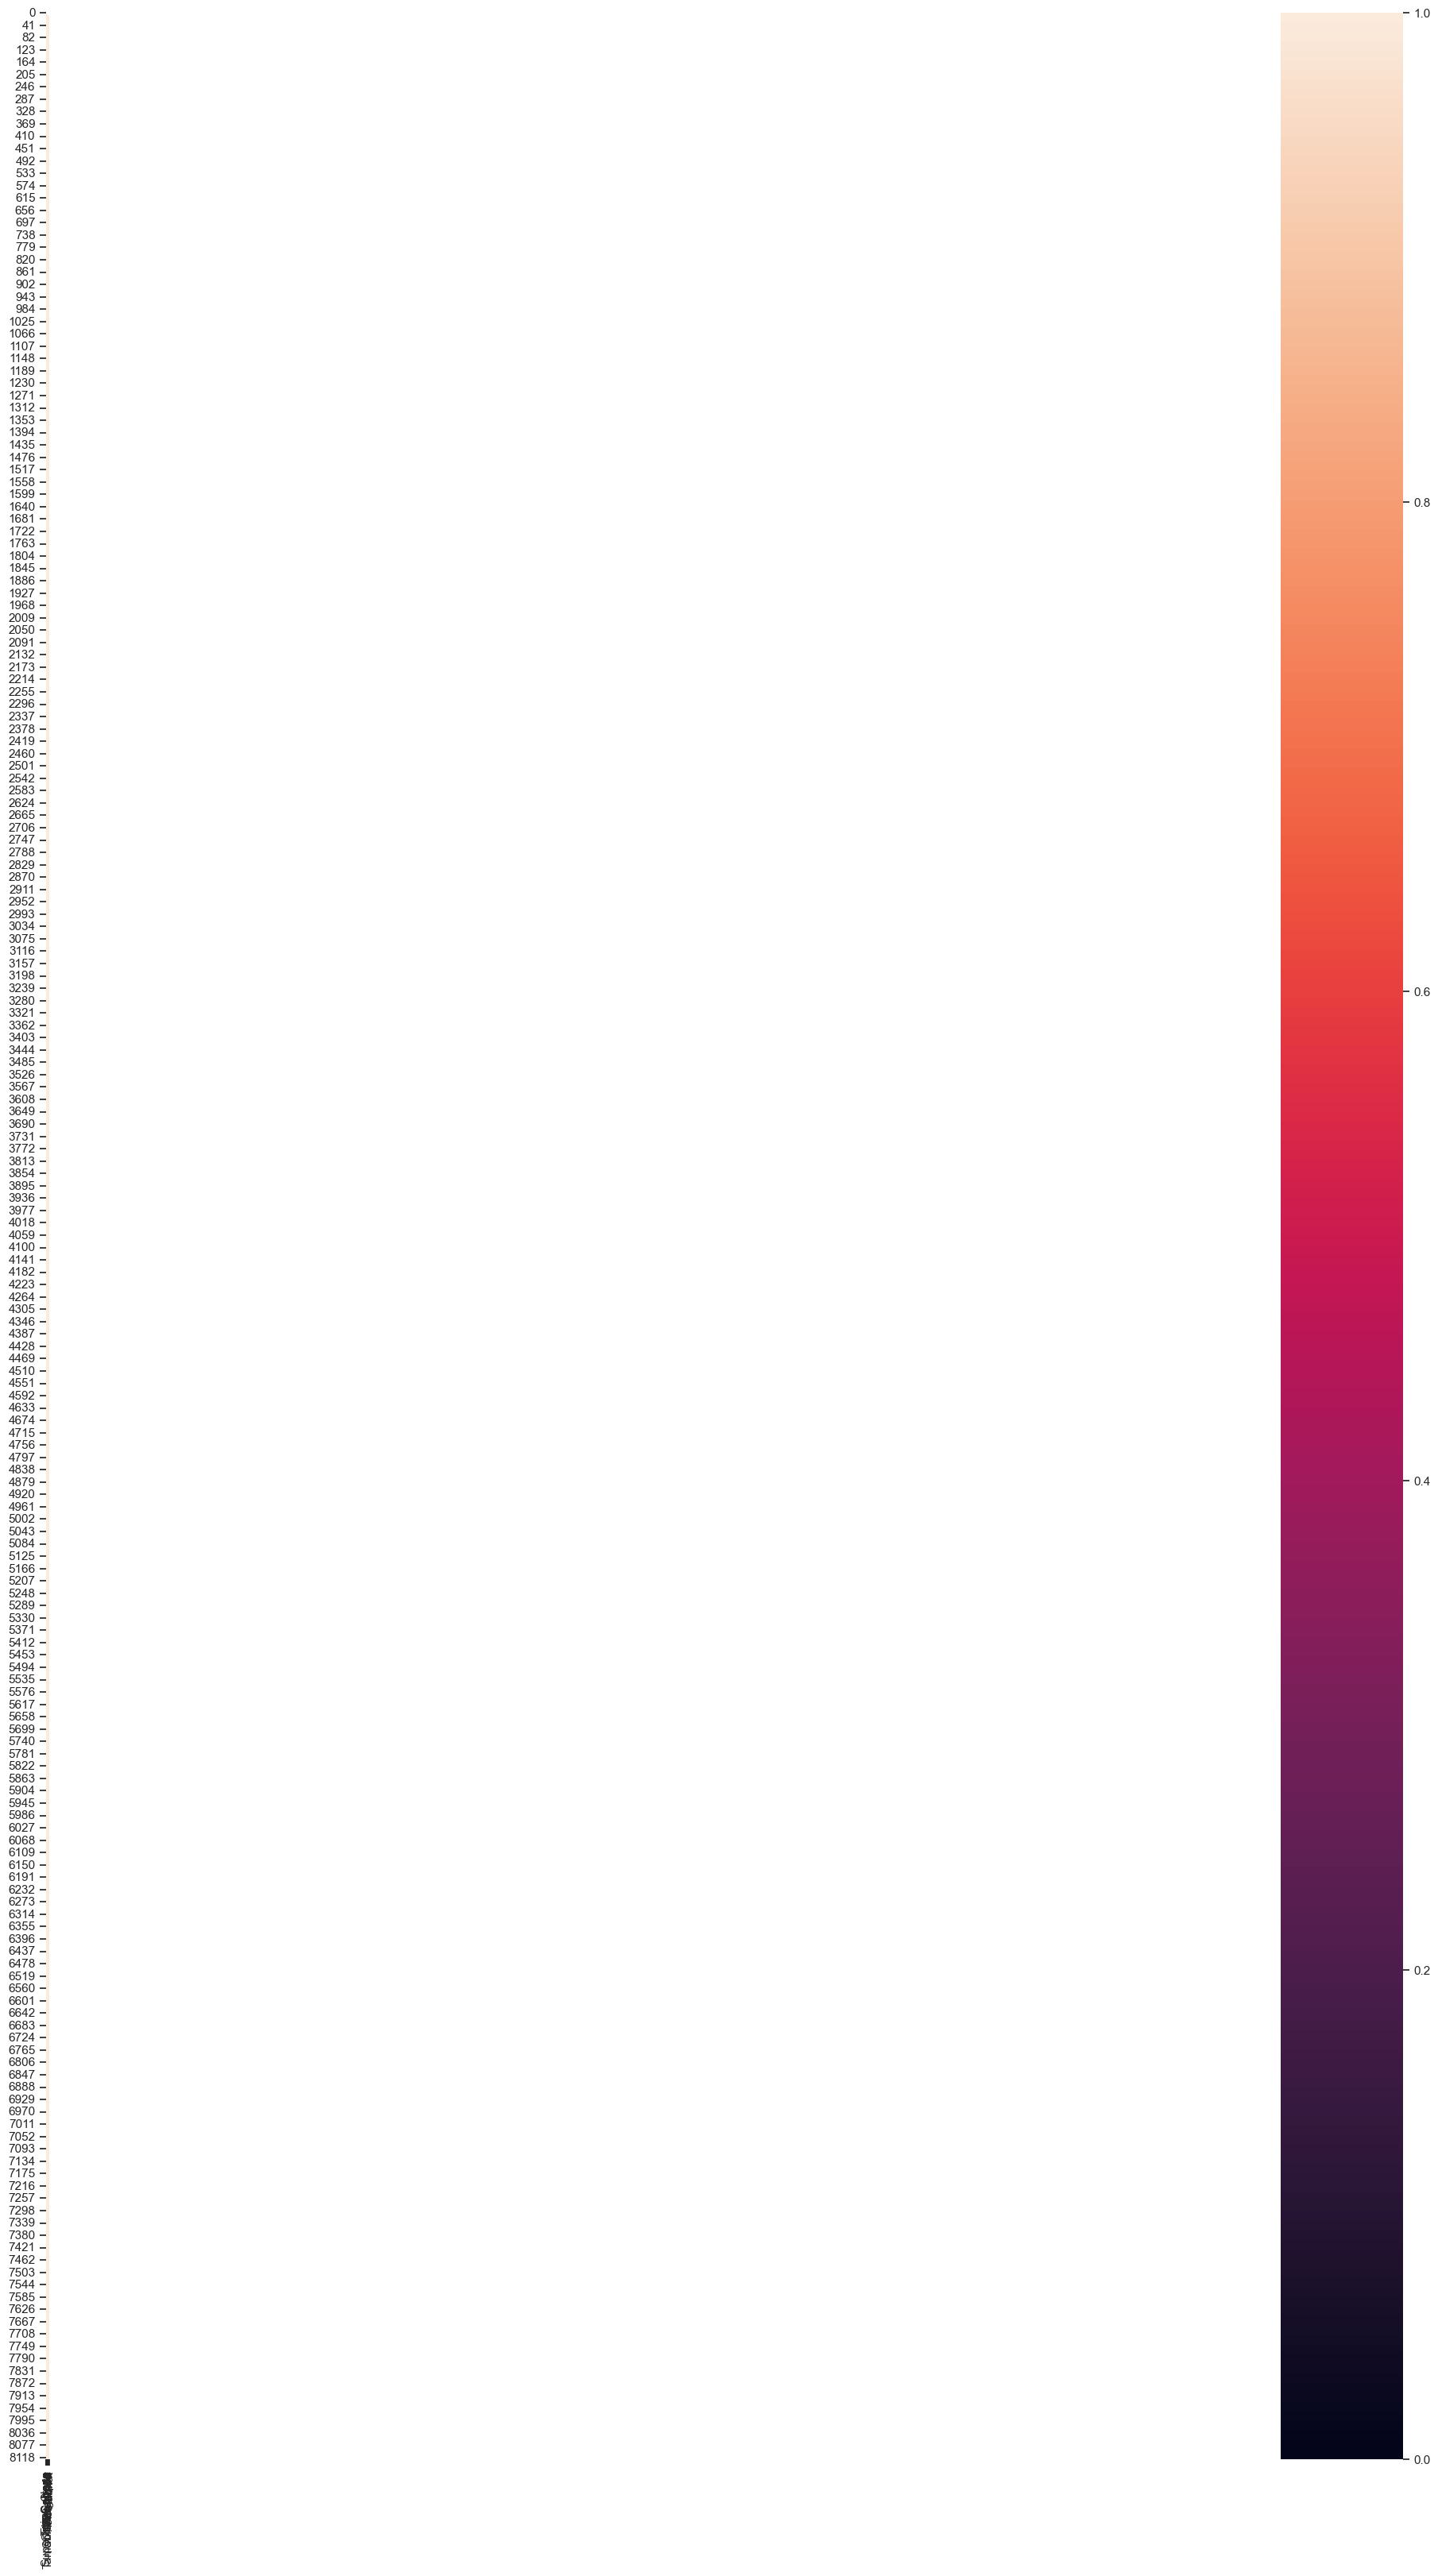

In [525]:
import matplotlib.pyplot as plt
import seaborn as sns

mask = np.zeros_like(data_set, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
#with sns.axes_style("white"):
ax = sns.heatmap(data_set, mask=mask,vmin=0., vmax=1, square=True)

 <h2>Codificacion de variables Categoricas mediante One Hot Encoding</h2>

El data set cuenta con variables que tienen varias categorias como Tipo de Cabeza y otras que tienen menos como Clase. 
Entonces para realizar One Hot Encoding procedo primero a dividir mi data set de trabajo en dos, o mejor dicho crear 2 data set nuevos a partir del original para asi tener las variables que quiero codificar y las que quiero dejar como estan. 

In [517]:
data_set_encode.head(4)

Clase TipoCabeza SuperficieCabeza ColorCabeza Moretones Fragancia  \
0    venenosa    convexa             lisa      marron        si      acre   
1  comestible    convexa             lisa    amarillo        si  almendra   
2  comestible    campana             lisa      blanco        si      anis   
3    venenosa    convexa         escamosa      blanco        si      acre   

  TamannoBranquia ColorBranquia  FormaTallo Poblacion Habitat  
0        estrecho         negro  agrandando  dispersa  urbano  
1           ancho         negro  agrandando  numerosa  pastos  
2           ancho        marron  agrandando  numerosa  prados  
3        estrecho        marron  agrandando  dispersa  urbano

In [518]:
p=[data_set_encode.Clase,data_set_encode.Moretones,data_set_encode.FormaTallo,data_set_encode.TamannoBranquia]
m=[data_set_encode.TipoCabeza,data_set_encode.SuperficieCabeza,data_set_encode.ColorCabeza,data_set_encode.Fragancia,data_set_encode.ColorBranquia,data_set_encode.Poblacion,data_set_encode.Habitat]
Muchas_categorias=pd.DataFrame(m)
Pocas_categorias=pd.DataFrame(p)
Pocas_categorias=Pocas_categorias.transpose()
Muchas_categorias=Muchas_categorias.transpose()

In [519]:
Pocas_categorias.head(5)

Clase Moretones    FormaTallo TamannoBranquia
0    venenosa        si    agrandando        estrecho
1  comestible        si    agrandando           ancho
2  comestible        si    agrandando           ancho
3    venenosa        si    agrandando        estrecho
4  comestible        no  disminuyendo           ancho

In [520]:
Muchas_categorias.head(5)

TipoCabeza SuperficieCabeza ColorCabeza Fragancia ColorBranquia  Poblacion  \
0    convexa             lisa      marron      acre         negro   dispersa   
1    convexa             lisa    amarillo  almendra         negro   numerosa   
2    campana             lisa      blanco      anis        marron   numerosa   
3    convexa         escamosa      blanco      acre        marron   dispersa   
4    convexa             lisa        gris   inoloro         negro  abundante   

  Habitat  
0  urbano  
1  pastos  
2  prados  
3  urbano  
4  pastos

Inicializo el codificador de categorias

In [521]:
ce_ohe=one_hot.OneHotEncoder(use_cat_names=True) 

Entreno el transformador

In [522]:
ce_dummies=ce_ohe.fit_transform(Muchas_categorias)
ce_dummies.head(5)

TipoCabeza_convexa  TipoCabeza_campana  TipoCabeza_hundida  \
0                   1                   0                   0   
1                   1                   0                   0   
2                   0                   1                   0   
3                   1                   0                   0   
4                   1                   0                   0   

   TipoCabeza_plana  TipoCabeza_protuberante  TipoCabeza_conica  \
0                 0                        0                  0   
1                 0                        0                  0   
2                 0                        0                  0   
3                 0                        0                  0   
4                 0                        0                  0   

   SuperficieCabeza_lisa  SuperficieCabeza_escamosa  SuperficieCabeza_fibrosa  \
0                      1                          0                         0   
1                      1                          0                         0   
2                      1                          0                         0   
3                      0                          1                         0   
4                      1                          0                         0   

   SuperficieCabeza_ranuras  ...  Poblacion_diversa  Poblacion_solitaria  \
0                         0  ...                  0                    0   
1                         0  ...                  0                    0   
2                         0  ...                  0                    0   
3                         0  ...                  0                    0   
4                         0  ...                  0                    0   

   Poblacion_agrupada  Habitat_urbano  Habitat_pastos  Habitat_prados  \
0                   0               1               0               0   
1                   0               0               1               0   
2                   0               0               0               1   
3                   0               1               0               0   
4                   0               0               1               0   

   Habitat_bosques  Habitat_senderos  Habitat_residuos  Habitat_hojas  
0                0                 0                 0              0  
1                0                 0                 0              0  
2                0                 0                 0              0  
3                0                 0                 0              0  
4                0                 0                 0              0  

[5 rows x 54 columns]

Creo un dataframe a partir de la transformacion

In [523]:
ce_dummies=pd.DataFrame(ce_dummies)
data_set_trabajo=pd.concat([ce_dummies,Pocas_categorias], axis=1) #

In [524]:
data_set_trabajo.head(5)

TipoCabeza_convexa  TipoCabeza_campana  TipoCabeza_hundida  \
0                   1                   0                   0   
1                   1                   0                   0   
2                   0                   1                   0   
3                   1                   0                   0   
4                   1                   0                   0   

   TipoCabeza_plana  TipoCabeza_protuberante  TipoCabeza_conica  \
0                 0                        0                  0   
1                 0                        0                  0   
2                 0                        0                  0   
3                 0                        0                  0   
4                 0                        0                  0   

   SuperficieCabeza_lisa  SuperficieCabeza_escamosa  SuperficieCabeza_fibrosa  \
0                      1                          0                         0   
1                      1                          0                         0   
2                      1                          0                         0   
3                      0                          1                         0   
4                      1                          0                         0   

   SuperficieCabeza_ranuras  ...  Habitat_pastos  Habitat_prados  \
0                         0  ...               0               0   
1                         0  ...               1               0   
2                         0  ...               0               1   
3                         0  ...               0               0   
4                         0  ...               1               0   

   Habitat_bosques  Habitat_senderos  Habitat_residuos  Habitat_hojas  \
0                0                 0                 0              0   
1                0                 0                 0              0   
2                0                 0                 0              0   
3                0                 0                 0              0   
4                0                 0                 0              0   

        Clase  Moretones    FormaTallo  TamannoBranquia  
0    venenosa         si    agrandando         estrecho  
1  comestible         si    agrandando            ancho  
2  comestible         si    agrandando            ancho  
3    venenosa         si    agrandando         estrecho  
4  comestible         no  disminuyendo            ancho  

[5 rows x 58 columns]